Arjun Joshi. Brainstation Capstone <br>
December, 2024<br>
Diploma Program: Data Science

<html>
<style>
sup {
    vertical-align: super;
    font-size: smaller;
}
</style>
<p>
<sub><h3><center>Capstone. Case Study: Application of Anthropogenic WSM </center></h3></sub>
<sup></sup><h1> <center>DATA CLEANING, EDA & PRE-PROCESSING</sup>
<sup><h3> .ANTHROPOGENIC PRESSURES. </h3></sup><center></center></h1>
</html>


##### Run intro scripts

In [4]:
# Set working directory to notebook dir
import os
os.chdir('J:\\Brainstation\\BS Git\\Tampa_Apollo_AnthropogenicIndex\\notebooks')

In [8]:
# Load libraries
%run ./scripts/imports.py
%run ./scripts/DataDictionary.py
%run ./scripts/stored_functions.py

### **Introduction : Context and Notebook Overview**

As stated in the ReadMe, 3 supplementary notebooks cover cleaning, EDA, requisite baseline modelling for each individual environment/ecosystem/overarching framework - which are ultimately used to measure the performance of the Anthropogenic Pressure Index (API)

Figure 1 below shows the geography, scale and basic information about the Tampa Region. The marked area in white in the top left image shows the town where the marine construction in this case study has been proposed.

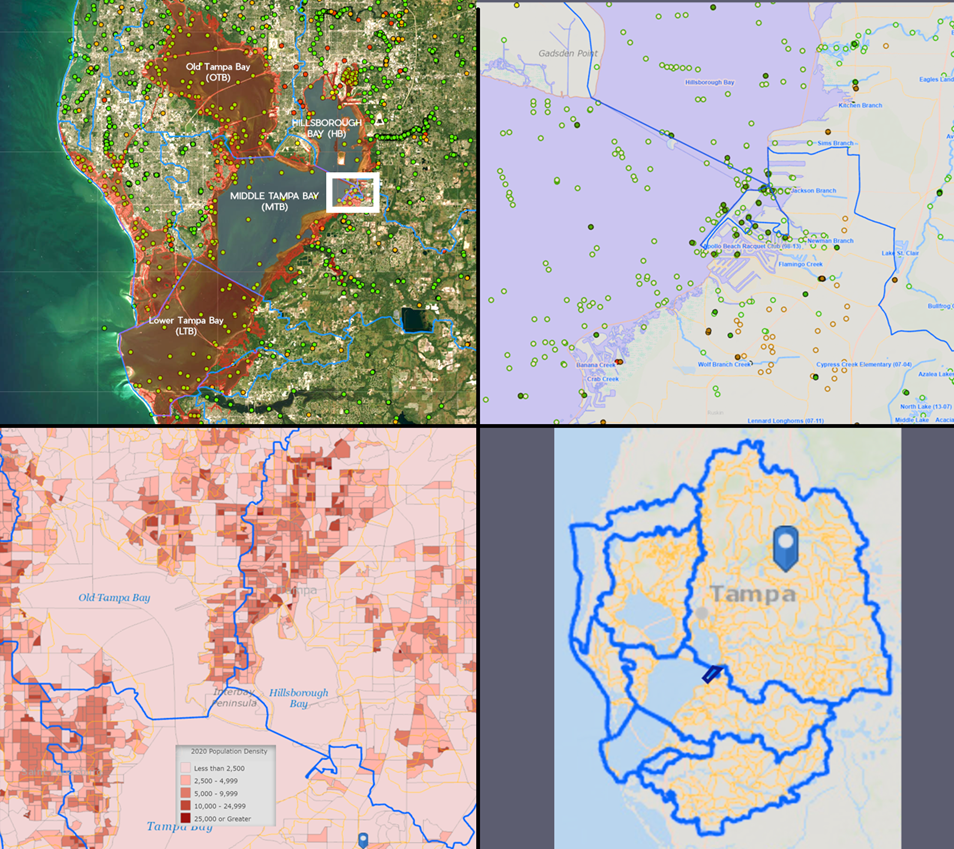

<sup>Figure1.<br>
> (A) Top L. marked sections of Tampa Bay <br>
> (B) Top R. Sampling Sites Near Proposed Construction site. prominent filled circles are active, all others are not inactive <br>
> (C) Bottom L. 2020 Population Density of Tampa Bay Region <br>
> (D) Bottom R. The massive scale of the watershed, the marked area is the HB watershed and the one directly underneath is MTB. <br>Marking in the >     center of the the image is the proposed study site </sup>


>>> Regional Watershed Area Descriptions.<br>
>>> **HB Watershed**: Area (Sq Miles) : 1,281.83 <br>
>>> **MTB watershed**: Area (Sq Miles) : 410.31 <br>

When considering the nutrient loading, nitrogen in particular, it's important to understand the scale of the watershed - all of which flows into the bay. The H.C. is massive, covering nearly 1300 sq miles. That area includes large amounts of agricultral land, new residential and commercial construction.

Notebook Context: This notebook processes what is considered to be data describing Anthropogenic Pressures on the coastal ecosystem.
Notebook Purpose: Clean, Pre-process Anth.Gen. data, including EDA and baseline modelling, in order to establish crucial relationships between features.<br> This notebook requires an understanding of Nitrogen compounds in the ecosystem, if they're organic or not and their patterns over time. Unlike the biology specific data, Anth. Gen. data obtained has a sampling structure and consistency to attempt a Time-Series Analysis.
<br>
<br>
*I encourage anyone reviewing the code to utilize the Table of Contents for easy navigation.*<br>
Each subcategory has it's own section for cleaning, EDA, processing and baselines modelling (if applicable)
There are 3 major areas of focus covered, the notebook is also organized accordingly:<BR>
1. Section: Nitrate Concentrations, Water Quality (ADF, TSA)
2. Section: Property Development Metrics
3. Section: Population Growth Metrics (Linear Regression)


##### Post-Intro Note : 2 Features Omitted

*Two additional possible sources of anth. pressures were in the original design of the study: marine recreational traffic and geospatial analysis. These were omitted because it was not feasible to get records of marine traffic without paying a respectable amount for GIS-hosted GPS data for vessels. Data obtained did not include GPS during a trip, only start, end and if any stops were made or ports called upon. Geospatial data had to be omitted due to loss of data due to hardware issues. This will be pursued in subsequent expansion on this study.*

*Please refer to the ReadMe for a more detailed look into the complexities and impacts of Anth. Gen. on coastal marine ecosystems.*

### Fx, Definitions, Read Data

#### Functions (if applicable)

#### Read CSV into Pandas DF

##### Nutrient Loading Data

In [345]:
os.chdir('J:/Brainstation/BS Git/data/human Imact')

In [346]:
# There are 4 sections of Tampa Bay.
# This study covers 2 but can expanded to all. Refer to map in introduction section

# Import Middle Tampa Bay (MTB) Water Quality (WQ) data. 1990-2024
mtbwq=pd.read_csv('MTB_WQ.csv',low_memory=False)

# Import Hillsborough Bay (HB) W.Q. data. 1990-2024
hbwq=pd.read_csv('HB_WTQ.csv',low_memory=False)

##### Property Development

In [375]:
# New data directory
os.chdir('J:/Brainstation/BS Git/Property Records')

In [376]:
proprx=pd.read_csv('PRIMARY_PROPRX.csv',low_memory='False')

C:\Users\Ajax\AppData\Local\Temp\ipykernel_84184\3142466767.py:1: DtypeWarning: Columns (1,4,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  proprx=pd.read_csv('PRIMARY_PROPRX.csv',low_memory='False')


In [377]:
# Old Table read-ins from design phase using subset data
# Subset dfs
# Original Sectioned Property Records
AB_1=pd.read_csv('AB_1.csv')
AB_2=pd.read_csv('AB_BLVD_SPIT_1.csv')
AB_3=pd.read_csv('AB_Central_1.csv')
AB_4=pd.read_csv('AB_INTSXN_1.csv')
AB_5=pd.read_csv('AB_SOUTH_1.csv')
AB_6=pd.read_csv('AB_SOUTH_2.csv')
AB_7=pd.read_csv('AB_SPIT_1.csv')
GIB_8=pd.read_csv('GIB_MAIN_1.csv')
RIV_1=pd.read_csv('RIV_W_1.csv')

##### Population Growth

In [349]:
os.chdir('J:\\Brainstation\\BS Git\\data\\human Imact\\MarineTraffic')

In [350]:
dfpop_staged=pd.read_csv('StagedPopulations.csv')

## Part 1:Nitrate Loading; Water Quality Index

Tables loaded in at start of notebook.<br>Tables:<BR>
> _(hbwq)_   Hillsborough Bay (HB)<br>
> _(mtbwq)_ Middle Tampa Bay (MTB)<br>
These 2 data sets are closest in proximmity to the study site, the focus of the study. <br>
This dataset can always be expanded at a later date.

Objective: <BR>Establish clear pattern between 3 forms of Nitrogen compounds in the bay:<br>
Nitrates and Nitrates (NO3,NO2-).   Ammonia/Ammonium (NH3).       Organic Nitrogen.

Key Info:<BR>
Nitrates/Nitrites (NO3, No2-), and ammonia(NH3/NH4+) are inorganic forms of nitrogen and either represent the slow breakdown of organic material or input from external sources. Part 1 must demonstrate that NH3 and N03 compound(s) vary, with significance, from behaviors and patterns observed in Organic Nitrogen.
mtbwq.head(5)

In [165]:
# Df read-in check
hbwq.head(5)

DataSourceName  DataSourceCode    StationID  \
0  FDEP Southwest Regional Operations Center  STORET_21FLTPA  2.74734E+14   
1  FDEP Southwest Regional Operations Center  STORET_21FLTPA  2.74734E+14   
2  FDEP Southwest Regional Operations Center  STORET_21FLTPA  2.74734E+14   
3  FDEP Southwest Regional Operations Center  STORET_21FLTPA  2.74734E+14   
4  FDEP Southwest Regional Operations Center  STORET_21FLTPA  2.74734E+14   

   ActualStationID  Latitude_DD  Longitude_DD SampleDate SampleTime  \
0              NaN    27.792639    -82.413861  4/25/2006    0:00:00   
1              NaN    27.792639    -82.413861  4/25/2006    0:00:00   
2              NaN    27.792639    -82.413861  4/25/2006    0:00:00   
3              NaN    27.792639    -82.413861  4/25/2006    0:00:00   
4              NaN    27.792639    -82.413861  4/25/2006    0:00:00   

   ActivityDepth ActivityDepthUnit               Characteristic  ResultValue  \
0            0.2                 m                    Fluorides         1.00   
1            0.2                 m               Fecal Coliform        10.00   
2            0.2                 m             Dissolved Solids     27200.00   
3            0.2                 m  Dissolved oxygen saturation        80.80   
4            0.2                 m        Dissolved oxygen (DO)         4.68   

    ResultUnit ValueQualifier ResultComment  WaterbodyID     WaterbodyName  
0         mg/l            NaN           NaN        20005  Hillsborough Bay  
1    cfu/100ml            NaN           NaN        20005  Hillsborough Bay  
2         mg/l            NaN           NaN        20005  Hillsborough Bay  
3  percent (%)            NaN           NaN        20005  Hillsborough Bay  
4         mg/l            NaN           NaN        20005  Hillsborough Bay

In [166]:
# Df read-in check
mtbwq.head(5)

WBodyID     WaterBodyName DataSource        StationID        StationName  \
0    20007  Middle Tampa Bay  USGS_NWIS  274237082325800   10F TAMPA BAY 11   
1    20007  Middle Tampa Bay  USGS_NWIS  274237082325800   10F TAMPA BAY 11   
2    20007  Middle Tampa Bay  USGS_NWIS  274237082325800   10F TAMPA BAY 11   
3    20007  Middle Tampa Bay  USGS_NWIS  274237082325800   10F TAMPA BAY 11   
4    20007  Middle Tampa Bay  USGS_NWIS  274237082325800   10F TAMPA BAY 11   

     Actual_StationID  Actual_Latitude  Actual_Longitude DEP_WBID  \
0  ="274237082325800"        27.710586        -82.549263    1558B   
1  ="274237082325800"        27.710586        -82.549263    1558B   
2  ="274237082325800"        27.710586        -82.549263    1558B   
3  ="274237082325800"        27.710586        -82.549263    1558B   
4  ="274237082325800"        27.710586        -82.549263    1558B   

       SampleDate  ...  DepthUnits  Parameter                Characteristic  \
0  7/10/1972 0:00  ...           m     Cl_mgl                      Chloride   
1  7/10/1972 0:00  ...           m  NH3_N_ugl        Nitrogen, ammonia as N   
2  7/10/1972 0:00  ...           m  NH3_N_ugl        Nitrogen, ammonia as N   
3  7/10/1972 0:00  ...           m    NO3_ugl  Nitrogen, Nitrate (NO3) as N   
4  7/10/1972 0:00  ...           m         pH                            pH   

  Sample_Fraction Result_Value  Result_Unit QACode Result_Comment  \
0             NaN      18000.0          NaN    NaN            NaN   
1             NaN        550.0          NaN    NaN            NaN   
2             NaN        580.0          NaN    NaN            NaN   
3             NaN         10.0          NaN    NaN            NaN   
4             NaN          8.3          NaN    NaN            NaN   

  Original_Result_Value Original_Result_Unit  
0                 18000                 mg/l  
1                  0.55                 mg/l  
2                  0.58                 mg/l  
3                  0.01                 mg/l  
4                   8.3                  NaN  

[5 rows x 21 columns]

In [167]:
#null check
print(mtbwq.isna().sum())
hbwq.isna().sum()

WBodyID                       0
WaterBodyName                 0
DataSource                    0
StationID                     0
StationName                   0
Actual_StationID              0
Actual_Latitude               0
Actual_Longitude              0
DEP_WBID                      0
SampleDate                    0
ActivityDepth             47806
DepthUnits                    0
Parameter                     0
Characteristic             5507
Sample_Fraction          505439
Result_Value                  0
Result_Unit              102440
QACode                   449145
Result_Comment           501969
Original_Result_Value    153389
Original_Result_Unit     167747
dtype: int64


DataSourceName             0
DataSourceCode             0
StationID                  0
ActualStationID      1048575
Latitude_DD                0
Longitude_DD               0
SampleDate                 0
SampleTime                 0
ActivityDepth         766156
ActivityDepthUnit     758436
Characteristic        748461
ResultValue              985
ResultUnit            786325
ValueQualifier       1005190
ResultComment        1035222
WaterbodyID                0
WaterbodyName              0
dtype: int64

In [168]:
# Checking column names
mtbwq.Actual_Latitude
mtbwq.columns[[6,7]]

Index(['Actual_Latitude', 'Actual_Longitude'], dtype='object')

In [169]:
# Standardizing some columns between these 2 datasets

In [170]:
hbwq.rename(columns={'Latitude_DD':'Latitude','Longitude_DD':'Longitude'},inplace=True)
hbwq.head(5)

DataSourceName  DataSourceCode    StationID  \
0  FDEP Southwest Regional Operations Center  STORET_21FLTPA  2.74734E+14   
1  FDEP Southwest Regional Operations Center  STORET_21FLTPA  2.74734E+14   
2  FDEP Southwest Regional Operations Center  STORET_21FLTPA  2.74734E+14   
3  FDEP Southwest Regional Operations Center  STORET_21FLTPA  2.74734E+14   
4  FDEP Southwest Regional Operations Center  STORET_21FLTPA  2.74734E+14   

   ActualStationID   Latitude  Longitude SampleDate SampleTime  ActivityDepth  \
0              NaN  27.792639 -82.413861  4/25/2006    0:00:00            0.2   
1              NaN  27.792639 -82.413861  4/25/2006    0:00:00            0.2   
2              NaN  27.792639 -82.413861  4/25/2006    0:00:00            0.2   
3              NaN  27.792639 -82.413861  4/25/2006    0:00:00            0.2   
4              NaN  27.792639 -82.413861  4/25/2006    0:00:00            0.2   

  ActivityDepthUnit               Characteristic  ResultValue   ResultUnit  \
0                 m                    Fluorides         1.00         mg/l   
1                 m               Fecal Coliform        10.00    cfu/100ml   
2                 m             Dissolved Solids     27200.00         mg/l   
3                 m  Dissolved oxygen saturation        80.80  percent (%)   
4                 m        Dissolved oxygen (DO)         4.68         mg/l   

  ValueQualifier ResultComment  WaterbodyID     WaterbodyName  
0            NaN           NaN        20005  Hillsborough Bay  
1            NaN           NaN        20005  Hillsborough Bay  
2            NaN           NaN        20005  Hillsborough Bay  
3            NaN           NaN        20005  Hillsborough Bay  
4            NaN           NaN        20005  Hillsborough Bay

In [171]:
# Standardizing some columns between these 2 datasets

In [172]:
mtbwq.rename(columns={'Actual_Latitude':'Latitude','Actual_Longitude':'Longitude'},inplace=True)
mtbwq.head(5)

WBodyID     WaterBodyName DataSource        StationID        StationName  \
0    20007  Middle Tampa Bay  USGS_NWIS  274237082325800   10F TAMPA BAY 11   
1    20007  Middle Tampa Bay  USGS_NWIS  274237082325800   10F TAMPA BAY 11   
2    20007  Middle Tampa Bay  USGS_NWIS  274237082325800   10F TAMPA BAY 11   
3    20007  Middle Tampa Bay  USGS_NWIS  274237082325800   10F TAMPA BAY 11   
4    20007  Middle Tampa Bay  USGS_NWIS  274237082325800   10F TAMPA BAY 11   

     Actual_StationID   Latitude  Longitude DEP_WBID      SampleDate  ...  \
0  ="274237082325800"  27.710586 -82.549263    1558B  7/10/1972 0:00  ...   
1  ="274237082325800"  27.710586 -82.549263    1558B  7/10/1972 0:00  ...   
2  ="274237082325800"  27.710586 -82.549263    1558B  7/10/1972 0:00  ...   
3  ="274237082325800"  27.710586 -82.549263    1558B  7/10/1972 0:00  ...   
4  ="274237082325800"  27.710586 -82.549263    1558B  7/10/1972 0:00  ...   

   DepthUnits  Parameter                Characteristic Sample_Fraction  \
0           m     Cl_mgl                      Chloride             NaN   
1           m  NH3_N_ugl        Nitrogen, ammonia as N             NaN   
2           m  NH3_N_ugl        Nitrogen, ammonia as N             NaN   
3           m    NO3_ugl  Nitrogen, Nitrate (NO3) as N             NaN   
4           m         pH                            pH             NaN   

  Result_Value  Result_Unit QACode Result_Comment Original_Result_Value  \
0      18000.0          NaN    NaN            NaN                 18000   
1        550.0          NaN    NaN            NaN                  0.55   
2        580.0          NaN    NaN            NaN                  0.58   
3         10.0          NaN    NaN            NaN                  0.01   
4          8.3          NaN    NaN            NaN                   8.3   

  Original_Result_Unit  
0                 mg/l  
1                 mg/l  
2                 mg/l  
3                 mg/l  
4                  NaN  

[5 rows x 21 columns]

In [173]:
hbwq.Characteristic.value_counts()

Characteristic
Temperature, water                               45421
Salinity                                         33622
Specific conductance                             31115
Dissolved oxygen (DO)                            30145
pH                                               29934
                                                 ...  
Manganese                                            2
Nickel                                               2
Zinc                                                 2
Nitrogen, Nitrite (NO2) as N                         2
Anatoxin (toxin produced by blue green algae)        1
Name: count, Length: 61, dtype: int64

** This study uses Organic and Inorganic forms of nitrogen and phosphorous as a proxy for anthropogenic introduction of harmful chemicals into the bay. This study examines these 2 features in 2 main ways:<br>
- As an aggregate statistic that describes the functioning of the bay at large
- The  ratio of organic to inorganic  compounds that describe that extent of anthropogenic and ultimately harmful versions of these compounds introduced.

In [174]:
# looking specifically for the forms of Nitrogen.
# Nitrogen comes in Nitrogen Organic, Nitrogen, Nitrates, Nitrites, Ammonia, Ammonium

# HBWQ - Hillsborough Bay Water Quality
# MTBWQ - Middle Tampa Bay Water Quality

index_1=hbwq.Characteristic.str.contains('Nit,nit').index==True

In [175]:
len(index_1)

1048575

In [176]:
# Isolate Nit. in HB
Nit=hbwq.Characteristic.str.contains('Nitrogen')

In [177]:
Nit.head()

0    False
1    False
2    False
3    False
4    False
Name: Characteristic, dtype: object

In [178]:
# Phosphate isolation. Omitted.
# Remnant from initial EDA 
pho_hb=hbwq.Characteristic.str.contains('Phosph')

### Data Wrangling, EDA / Pre-Processing

#### WQI Sample Frequency, Consistency Check

In [179]:
# Begin EDA, aggregations for patterns
hbwq.SampleDate.str.slice(-4).value_counts().reset_index().sort_values(by='SampleDate')

SampleDate   count
29       1990    5554
27       1991    6780
22       1992   10118
25       1993    7243
30       1994    5342
28       1995    5786
33       1996    4647
34       1997    4210
32       1998    4774
31       1999    5241
26       2000    7240
24       2001    8175
20       2002   11832
14       2003   16191
12       2004   17539
16       2005   14191
18       2006   13397
21       2007   10974
13       2008   17388
8        2009   44686
6        2010   46000
7        2011   45450
5        2012   62884
3        2013   84322
4        2014   72862
2        2015  101276
0        2016  142721
1        2017  139705
9        2018   33339
10       2019   30042
11       2020   17624
15       2021   15681
19       2022   12091
17       2023   13790
23       2024    9480

In [180]:
hbwq.SampleDate=pd.to_datetime(hbwq.SampleDate)

In [181]:
mtbwq.SampleDate=pd.to_datetime(mtbwq.SampleDate)

In [182]:
# Sanity Check
hbwq.head(3)

DataSourceName  DataSourceCode    StationID  \
0  FDEP Southwest Regional Operations Center  STORET_21FLTPA  2.74734E+14   
1  FDEP Southwest Regional Operations Center  STORET_21FLTPA  2.74734E+14   
2  FDEP Southwest Regional Operations Center  STORET_21FLTPA  2.74734E+14   

   ActualStationID   Latitude  Longitude SampleDate SampleTime  ActivityDepth  \
0              NaN  27.792639 -82.413861 2006-04-25    0:00:00            0.2   
1              NaN  27.792639 -82.413861 2006-04-25    0:00:00            0.2   
2              NaN  27.792639 -82.413861 2006-04-25    0:00:00            0.2   

  ActivityDepthUnit    Characteristic  ResultValue ResultUnit ValueQualifier  \
0                 m         Fluorides          1.0       mg/l            NaN   
1                 m    Fecal Coliform         10.0  cfu/100ml            NaN   
2                 m  Dissolved Solids      27200.0       mg/l            NaN   

  ResultComment  WaterbodyID     WaterbodyName  
0           NaN        20005  Hillsborough Bay  
1           NaN        20005  Hillsborough Bay  
2           NaN        20005  Hillsborough Bay

In [183]:
mtbwq.head(3)

WBodyID     WaterBodyName DataSource        StationID        StationName  \
0    20007  Middle Tampa Bay  USGS_NWIS  274237082325800   10F TAMPA BAY 11   
1    20007  Middle Tampa Bay  USGS_NWIS  274237082325800   10F TAMPA BAY 11   
2    20007  Middle Tampa Bay  USGS_NWIS  274237082325800   10F TAMPA BAY 11   

     Actual_StationID   Latitude  Longitude DEP_WBID SampleDate  ...  \
0  ="274237082325800"  27.710586 -82.549263    1558B 1972-07-10  ...   
1  ="274237082325800"  27.710586 -82.549263    1558B 1972-07-10  ...   
2  ="274237082325800"  27.710586 -82.549263    1558B 1972-07-10  ...   

   DepthUnits  Parameter          Characteristic Sample_Fraction Result_Value  \
0           m     Cl_mgl                Chloride             NaN      18000.0   
1           m  NH3_N_ugl  Nitrogen, ammonia as N             NaN        550.0   
2           m  NH3_N_ugl  Nitrogen, ammonia as N             NaN        580.0   

   Result_Unit QACode Result_Comment Original_Result_Value  \
0          NaN    NaN            NaN                 18000   
1          NaN    NaN            NaN                  0.55   
2          NaN    NaN            NaN                  0.58   

  Original_Result_Unit  
0                 mg/l  
1                 mg/l  
2                 mg/l  

[3 rows x 21 columns]

    SampleDate  count
10           1    419
9            2    439
6            3    462
11           4    346
0            5    530
7            6    455
8            7    450
2            8    499
1            9    500
5           10    481
3           11    491
4           12    482


array([[<Axes: title={'center': 'SampleDate'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

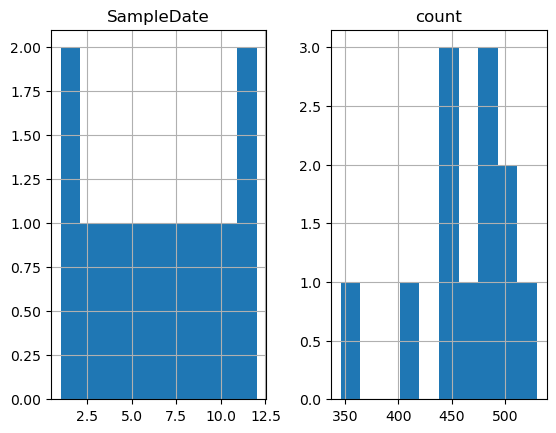

In [184]:
#Look at sample counts over time.
print(hbwq[hbwq.SampleDate.dt.year==1990].SampleDate.dt.month.value_counts().reset_index().sort_values(by='SampleDate'))
hbwq[hbwq.SampleDate.dt.year==1990].SampleDate.dt.month.value_counts().reset_index().sort_values(by='SampleDate').hist()

    SampleDate  count
6            1    795
7            2    791
9            3    766
10           4    718
2            5    827
4            6    805
8            7    786
1            8    886
3            9    809
0           10    981
11          11    658
5           12    803


array([[<Axes: title={'center': 'SampleDate'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

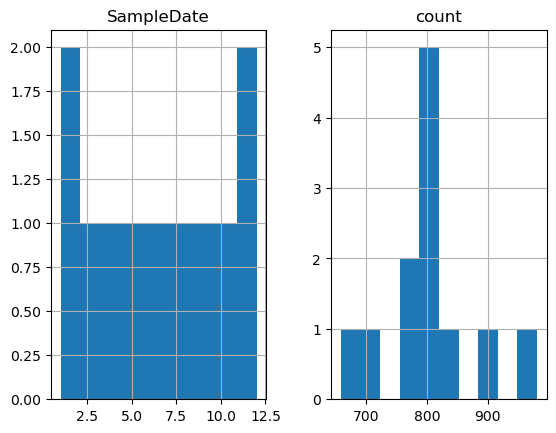

In [185]:
# Checking for distribution of sample counts by month
print(mtbwq[mtbwq.SampleDate.dt.year==1990].SampleDate.dt.month.value_counts().reset_index().sort_values(by='SampleDate'))
mtbwq[mtbwq.SampleDate.dt.year==1990].SampleDate.dt.month.value_counts().reset_index().sort_values(by='SampleDate').hist()

#### _Preliminary EDA and processing of subset, 1990, used in initial EDA and construction of baseline models. CODE OUTDATED_

In [186]:
# MTB. HB. Isolate for 1990
mtbwq1990=mtbwq[mtbwq.SampleDate.dt.year==1990]
hbwq1990=hbwq[hbwq.SampleDate.dt.year==1990]

In [187]:
# Exploring at data for 1 month
mtbwq1990[mtbwq1990.SampleDate.dt.month==1].sort_values(by='SampleDate')

WBodyID     WaterBodyName              DataSource StationID  \
510825    20007  Middle Tampa Bay                HCEPC_WQ        32   
130386    20007  Middle Tampa Bay                HCEPC_WQ        33   
130385    20007  Middle Tampa Bay                HCEPC_WQ        33   
130384    20007  Middle Tampa Bay                HCEPC_WQ        33   
130383    20007  Middle Tampa Bay                HCEPC_WQ        33   
...         ...               ...                     ...       ...   
82437     20007  Middle Tampa Bay  EPC_ROUTINE_MONITORING       136   
82438     20007  Middle Tampa Bay  EPC_ROUTINE_MONITORING       136   
82439     20007  Middle Tampa Bay  EPC_ROUTINE_MONITORING       136   
82427     20007  Middle Tampa Bay  EPC_ROUTINE_MONITORING       136   
82414     20007  Middle Tampa Bay  EPC_ROUTINE_MONITORING       136   

                 StationName Actual_StationID  Latitude  Longitude DEP_WBID  \
510825   Tampa Bay Marker 5G            ="32"   27.7931 -82.570600    1558C   
130386   Lower Old Tampa Bay            ="33"   27.8261 -82.567500    1558C   
130385   Lower Old Tampa Bay            ="33"   27.8261 -82.567500    1558C   
130384   Lower Old Tampa Bay            ="33"   27.8261 -82.567500    1558C   
130383   Lower Old Tampa Bay            ="33"   27.8261 -82.567500    1558C   
...                      ...              ...       ...        ...      ...   
82437          Cockroach Bay           ="136"   27.6800 -82.499199     1778   
82438          Cockroach Bay           ="136"   27.6800 -82.499199     1778   
82439          Cockroach Bay           ="136"   27.6800 -82.499199     1778   
82427          Cockroach Bay           ="136"   27.6800 -82.499199     1778   
82414          Cockroach Bay           ="136"   27.6800 -82.499199     1778   

                SampleDate  ...  DepthUnits    Parameter  \
510825 1990-01-03 00:00:00  ...           m  Cond_umhocm   
130386 1990-01-03 00:00:00  ...           m     Turb_ntu   
130385 1990-01-03 00:00:00  ...           m  Tcoli_100ml   
130384 1990-01-03 00:00:00  ...           m      TKN_ugl   
130383 1990-01-03 00:00:00  ...           m  Fcoli_100ml   
...                    ...  ...         ...          ...   
82437  1990-01-31 11:12:00  ...           m       TP_mgl   
82438  1990-01-31 11:12:00  ...           m      TKN_mgl   
82439  1990-01-31 11:12:00  ...           m       TN_mgl   
82427  1990-01-31 11:12:00  ...           m     norg_ugl   
82414  1990-01-31 11:12:00  ...           m      TempA_F   

              Characteristic Sample_Fraction Result_Value  Result_Unit QACode  \
510825  Specific conductance             NaN     45300.00         umho    NaN   
130386             Turbidity             NaN         3.00          NTU    NaN   
130385        Total Coliform             NaN         4.00    cfu/100ml    NaN   
130384    Nitrogen, Kjeldahl             NaN       680.00         ug/l    NaN   
130383        Fecal Coliform             NaN         4.00    cfu/100ml    NaN   
...                      ...             ...          ...          ...    ...   
82437        Phosphorus as P             NaN         0.52         mg/l    NaN   
82438     Nitrogen, Kjeldahl             NaN         1.31         mg/l    NaN   
82439               Nitrogen             NaN         1.38         mg/l      C   
82427      Nitrogen, organic             NaN      1270.00         ug/l      C   
82414       Temperature, air             NaN        71.60        deg F    NaN   

       Result_Comment Original_Result_Value Original_Result_Unit  
510825            NaN                   NaN                  NaN  
130386            NaN                   NaN                  NaN  
130385            NaN                   NaN                  NaN  
130384            NaN                   NaN                  NaN  
130383            NaN                   NaN                  NaN  
...               ...                   ...                  ...  
82437             NaN                  0.52

In [188]:
# Format dt values
mtbwq.SampleDate=pd.to_datetime(mtbwq.SampleDate)
hbwq.SampleDate=pd.to_datetime(hbwq.SampleDate)

<Axes: >

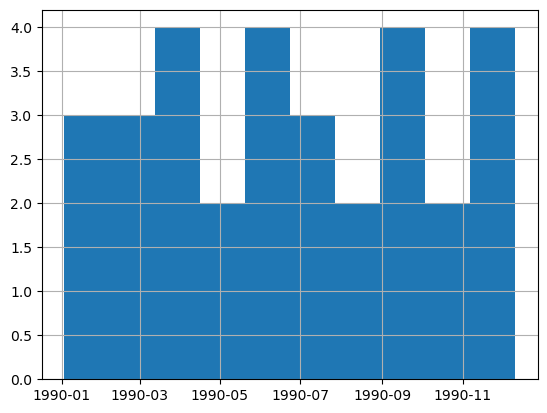

In [189]:
# Look at sampling
hbwq1990_samplefreq=hbwq1990.SampleDate.value_counts().reset_index().sort_values(by='SampleDate').reset_index(drop=True)
hbwq1990_samplefreq.SampleDate.hist()

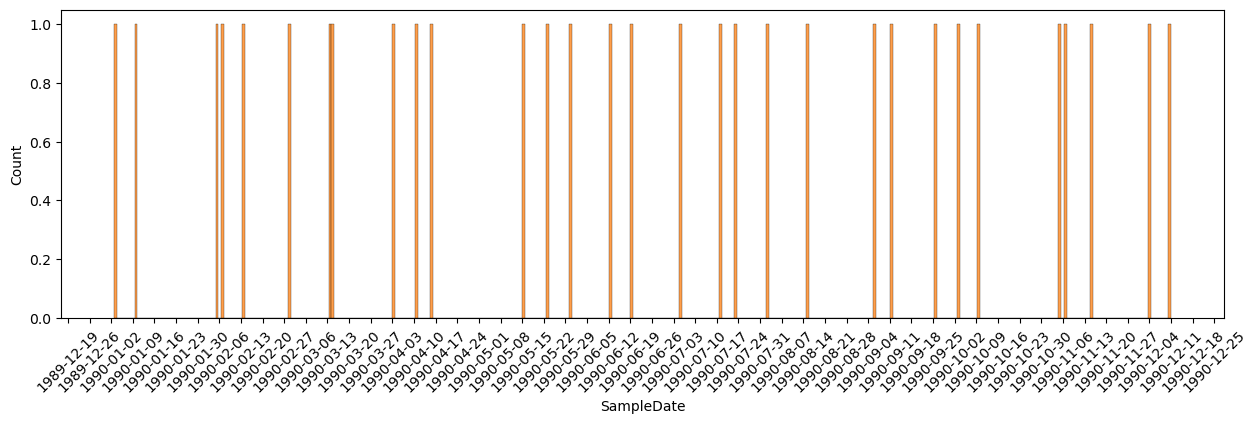

In [190]:
# Looking for missing weekly samples
import matplotlib.dates as mdates

plt.figure(figsize=(15,4))
sns.histplot()
ax = sns.histplot(x=hbwq1990_samplefreq.SampleDate,bins=365)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
#plt.xticks(range('1990-01-01','1990-12-31', 365))
plt.show()

In [191]:
#sanity
hbwq1990.head(2)

DataSourceName DataSourceCode StationID  ActualStationID  \
22449  EPC Water Quality Data       HCEPC_WQ        55              NaN   
22450  EPC Water Quality Data       HCEPC_WQ        55              NaN   

        Latitude  Longitude SampleDate SampleTime  ActivityDepth  \
22449  27.849166 -82.431385 1990-01-10    0:00:00           2.23   
22450  27.849166 -82.431385 1990-02-14    0:00:00           2.44   

      ActivityDepthUnit  Characteristic  ResultValue ResultUnit  \
22449               m    Fecal Coliform          4.0  cfu/100ml   
22450               m    Fecal Coliform          4.0  cfu/100ml   

      ValueQualifier ResultComment  WaterbodyID     WaterbodyName  
22449            NaN           NaN        20005  Hillsborough Bay  
22450            NaN           NaN        20005  Hillsborough Bay

In [192]:
# Isolate Nitrates, complete examination of subset of data
nitrogen_1990=hbwq1990[hbwq1990.Characteristic.str.contains('Nitr','nitr')==True]
nitrogen_1990.head(5)

DataSourceName DataSourceCode StationID  ActualStationID  \
22768  EPC Water Quality Data       HCEPC_WQ        55              NaN   
22769  EPC Water Quality Data       HCEPC_WQ        55              NaN   
22770  EPC Water Quality Data       HCEPC_WQ        55              NaN   
22771  EPC Water Quality Data       HCEPC_WQ        55              NaN   
22772  EPC Water Quality Data       HCEPC_WQ        55              NaN   

        Latitude  Longitude SampleDate SampleTime  ActivityDepth  \
22768  27.849166 -82.431385 1990-01-10    0:00:00           2.23   
22769  27.849166 -82.431385 1990-02-14    0:00:00           2.44   
22770  27.849166 -82.431385 1990-03-14    0:00:00           2.59   
22771  27.849166 -82.431385 1990-04-11    0:00:00           2.59   
22772  27.849166 -82.431385 1990-05-16    0:00:00           2.59   

      ActivityDepthUnit Characteristic  ResultValue ResultUnit ValueQualifier  \
22768               m         Nitrogen        930.0       ug/l            NaN   
22769               m         Nitrogen       1120.0       ug/l            NaN   
22770               m         Nitrogen        720.0       ug/l            NaN   
22771               m         Nitrogen        610.0       ug/l            NaN   
22772               m         Nitrogen        940.0       ug/l            NaN   

      ResultComment  WaterbodyID     WaterbodyName  
22768           NaN        20005  Hillsborough Bay  
22769           NaN        20005  Hillsborough Bay  
22770           NaN        20005  Hillsborough Bay  
22771           NaN        20005  Hillsborough Bay  
22772           NaN        20005  Hillsborough Bay

##### EDA: Isolation of Nitrogen Compounds, 1990 subset

The dataset has multiple entries for each sample event. The same sample is analyzed and described in multiple ways. Consequently, data needs to be isolated to get a consistent single data set.

In [193]:
# Create Phosphate df
phosphate_hb=hbwq[hbwq.Characteristic.str.contains('Phos','phos')==True]
phosphate_hb.SampleDate=pd.to_datetime(phosphate_hb.SampleDate)
phosphate_hb.head(2)

C:\Users\Ajax\AppData\Local\Temp\ipykernel_84184\345737480.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phosphate_hb.SampleDate=pd.to_datetime(phosphate_hb.SampleDate)


DataSourceName  DataSourceCode    StationID  \
21  FDEP Southwest Regional Operations Center  STORET_21FLTPA  2.74734E+14   
22  FDEP Southwest Regional Operations Center  STORET_21FLTPA  2.74734E+14   

    ActualStationID   Latitude  Longitude SampleDate SampleTime  \
21              NaN  27.792639 -82.413861 2006-10-03    0:00:00   
22              NaN  27.792639 -82.413861 2006-10-03    0:00:00   

    ActivityDepth ActivityDepthUnit                    Characteristic  \
21            0.2                 m                   Phosphorus as P   
22            0.2                 m  Phosphorus, phosphate (PO4) as P   

    ResultValue ResultUnit ValueQualifier ResultComment  WaterbodyID  \
21        280.0       ug/l            NaN           NaN        20005   
22          0.2       mg/l            NaN           NaN        20005   

       WaterbodyName  
21  Hillsborough Bay  
22  Hillsborough Bay

In [194]:
#Isolate Phosphate
phosphate_1990=hbwq1990[hbwq1990.Characteristic.str.contains('Phos','phos')==True]
phosphate_1990.head(5)

DataSourceName DataSourceCode StationID  ActualStationID  \
23711  EPC Water Quality Data       HCEPC_WQ        44              NaN   
25728  EPC Water Quality Data       HCEPC_WQ        44              NaN   
25729  EPC Water Quality Data       HCEPC_WQ        44              NaN   
25764  EPC Water Quality Data       HCEPC_WQ        55              NaN   
25849  EPC Water Quality Data       HCEPC_WQ         6              NaN   

        Latitude  Longitude SampleDate SampleTime  ActivityDepth  \
23711  27.923609 -82.480832 1990-12-11    0:00:00           0.91   
25728  27.923609 -82.480832 1990-06-13    0:00:00           1.07   
25729  27.923609 -82.480832 1990-10-10    0:00:00           0.91   
25764  27.849166 -82.431385 1990-09-12    0:00:00           2.44   
25849  27.889443 -82.477497 1990-02-14    0:00:00           1.52   

      ActivityDepthUnit                    Characteristic  ResultValue  \
23711               m    Phosphorus, phosphate (PO4) as P         0.30   
25728               m                     Phosphorus as P         0.65   
25729               m                     Phosphorus as P         0.42   
25764               m                     Phosphorus as P         0.63   
25849               m                     Phosphorus as P         0.52   

      ResultUnit ValueQualifier ResultComment  WaterbodyID     WaterbodyName  
23711       mg/l            NaN           NaN        20005  Hillsborough Bay  
25728       mg/l            NaN           NaN        20005  Hillsborough Bay  
25729       mg/l            NaN           NaN        20005  Hillsborough Bay  
25764       mg/l            NaN           NaN        20005  Hillsborough Bay  
25849       mg/l            NaN           NaN        20005  Hillsborough Bay

In [195]:
# Checking Units
pd.concat([nitrogen_1990.Characteristic.value_counts(),nitrogen_1990.ResultUnit.value_counts()],axis=1)

count  count
Nitrogen, Kjeldahl                            362.0    NaN
Nitrogen                                      349.0    NaN
Nitrogen, Nitrite (NO2) + Nitrate (NO3) as N  338.0    NaN
Nitrogen, ammonia as N                        319.0    NaN
Nitrogen, organic                             311.0    NaN
Nitrogen, Nitrate (NO3) as N                   14.0    NaN
mg/l                                            NaN  831.0
ug/l                                            NaN  699.0

In [196]:
# Isolate Nit
nitrate1990=nitrogen_1990[nitrogen_1990.Characteristic.str.contains('Nitrogen, Nitrite')]
print(nitrate1990.shape)
nitrate1990.reset_index(drop=True,inplace=True)
nitrate1990.head(3)

(338, 17)


DataSourceName DataSourceCode StationID  ActualStationID  \
0  EPC Water Quality Data       HCEPC_WQ         7              NaN   
1  EPC Water Quality Data       HCEPC_WQ         7              NaN   
2  EPC Water Quality Data       HCEPC_WQ         7              NaN   

    Latitude  Longitude SampleDate SampleTime  ActivityDepth  \
0  27.858887 -82.468609 1990-01-10    0:00:00           1.68   
1  27.858887 -82.468609 1990-02-14    0:00:00           1.68   
2  27.858887 -82.468609 1990-03-14    0:00:00           1.83   

  ActivityDepthUnit                                Characteristic  \
0               m    Nitrogen, Nitrite (NO2) + Nitrate (NO3) as N   
1               m    Nitrogen, Nitrite (NO2) + Nitrate (NO3) as N   
2               m    Nitrogen, Nitrite (NO2) + Nitrate (NO3) as N   

   ResultValue ResultUnit ValueQualifier ResultComment  WaterbodyID  \
0         10.0       ug/l            NaN           NaN        20005   
1         20.0       ug/l            NaN           NaN        20005   
2         10.0       ug/l            NaN           NaN        20005   

      WaterbodyName  
0  Hillsborough Bay  
1  Hillsborough Bay  
2  Hillsborough Bay

In [197]:
# Test nitrate isolation
nitrate1990[nitrate1990.ResultUnit.isna()]
nitrate1990.ResultUnit.fillna('ug/l',inplace=True)
nitrate1990[nitrate1990.ResultUnit.isna()]

C:\Users\Ajax\AppData\Local\Temp\ipykernel_84184\2110313770.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nitrate1990.ResultUnit.fillna('ug/l',inplace=True)
C:\Users\Ajax\AppData\Local\Temp\ipykernel_84184\2110313770.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nitrate1990.ResultUnit.fillna('ug/l',inplace=True)


Empty DataFrame
Columns: [DataSourceName, DataSourceCode, StationID, ActualStationID, Latitude, Longitude, SampleDate, SampleTime, ActivityDepth, ActivityDepthUnit, Characteristic, ResultValue, ResultUnit, ValueQualifier, ResultComment, WaterbodyID, WaterbodyName]
Index: []

In [198]:
# Standardize units
for i in nitrate1990.index:
    if nitrate1990.loc[i,'ResultUnit']=='ug/l':
        nitrate1990.loc[i,'ResultValue']=nitrate1990.loc[i,'ResultValue']/1000
        nitrate1990.loc[i,'ResultUnit']='mg/l'
        #ammonia1990.ResultValue=ammonia1990.ResultValue/1000

In [199]:
# Create subset with features of interest
nitrate_subset=nitrate1990[['DataSourceName','StationID','SampleDate','SampleTime','ResultValue','ResultUnit','Latitude','Longitude']]

In [200]:
# date format
nitrate_subset['month']=nitrate_subset.SampleDate.dt.month
nitrate_subset

C:\Users\Ajax\AppData\Local\Temp\ipykernel_84184\958506387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nitrate_subset['month']=nitrate_subset.SampleDate.dt.month


DataSourceName    StationID SampleDate  \
0                    EPC Water Quality Data            7 1990-01-10   
1                    EPC Water Quality Data            7 1990-02-14   
2                    EPC Water Quality Data            7 1990-03-14   
3                    EPC Water Quality Data            7 1990-04-11   
4                    EPC Water Quality Data            7 1990-05-16   
..                                      ...          ...        ...   
333    EPC Monthly Routine Water Monitoring           44 1990-07-18   
334    EPC Monthly Routine Water Monitoring            2 1990-10-10   
335    EPC Monthly Routine Water Monitoring           52 1990-11-07   
336  USGS National Water Information System  2.75134E+14 1990-02-07   
337  USGS National Water Information System  2.75134E+14 1990-06-19   

    SampleTime  ResultValue ResultUnit   Latitude  Longitude  month  
0      0:00:00        0.010       mg/l  27.858887 -82.468609      1  
1      0:00:00        0.020       mg/l  27.858887 -82.468609      2  
2      0:00:00        0.010       mg/l  27.858887 -82.468609      3  
3      0:00:00        0.020       mg/l  27.858887 -82.468609      4  
4      0:00:00        0.010       mg/l  27.858887 -82.468609      5  
..         ...          ...        ...        ...        ...    ...  
333    9:50:00        0.003       mg/l  27.923700 -82.480698      7  
334    9:30:00        0.020       mg/l  27.940800 -82.457901     10  
335   14:51:00        0.020       mg/l  27.896999 -82.438202     11  
336    0:00:00        0.040       mg/l  27.859747 -82.451205      2  
337    0:00:00        0.020       mg/l  27.859747 -82.451205      6  

[338 rows x 9 columns]

In [201]:
# look at nitrate patterns over 1 year period
nitrate_subset_plot=nitrate_subset.groupby('month').ResultValue.agg(['mean','std','min','max'])
nitrate_subset_plot.head(12)

mean       std    min   max
month                                 
1      0.022138  0.031466  0.003  0.15
2      0.020667  0.013374  0.010  0.08
3      0.011304  0.003444  0.010  0.02
4      0.013107  0.009171  0.003  0.03
5      0.007826  0.005140  0.003  0.02
6      0.009552  0.005779  0.003  0.02
7      0.009769  0.005969  0.003  0.02
8      0.009455  0.009145  0.003  0.05
9      0.009552  0.006905  0.003  0.03
10     0.010000  0.011626  0.003  0.07
11     0.010483  0.006775  0.003  0.03
12     0.026667  0.012710  0.010  0.04

In [202]:
# Isolate ammmonia
ammonia1990=nitrogen_1990[nitrogen_1990.Characteristic.str.contains('ammon')].sort_values(by='SampleDate').reset_index(drop=True)
print(ammonia1990.shape)
ammonia1990.head()

(319, 17)


DataSourceName          DataSourceCode StationID  \
0  EPC Monthly Routine Water Monitoring  EPC_ROUTINE_MONITORING         2   
1                EPC Water Quality Data                HCEPC_WQ         6   
2  EPC Monthly Routine Water Monitoring  EPC_ROUTINE_MONITORING        44   
3  EPC Monthly Routine Water Monitoring  EPC_ROUTINE_MONITORING        58   
4  EPC Monthly Routine Water Monitoring  EPC_ROUTINE_MONITORING        71   

   ActualStationID   Latitude  Longitude SampleDate SampleTime  ActivityDepth  \
0              NaN  27.940800 -82.457901 1990-01-10   13:45:00           0.30   
1              NaN  27.889443 -82.477497 1990-01-10    0:00:00           1.52   
2              NaN  27.923700 -82.480698 1990-01-10   10:45:00           0.70   
3              NaN  27.939800 -82.419601 1990-01-10    9:47:00           1.50   
4              NaN  27.876499 -82.413803 1990-01-10   14:27:00           1.10   

  ActivityDepthUnit          Characteristic  ResultValue ResultUnit  \
0                 m  Nitrogen, ammonia as N         0.02       mg/l   
1               m    Nitrogen, ammonia as N        40.00        NaN   
2                 m  Nitrogen, ammonia as N        30.00       ug/l   
3                 m  Nitrogen, ammonia as N         0.06       mg/l   
4                 m  Nitrogen, ammonia as N        40.00       ug/l   

  ValueQualifier ResultComment  WaterbodyID     WaterbodyName  
0             JI           NaN        20005  Hillsborough Bay  
1            NaN           NaN        20005  Hillsborough Bay  
2             JI           NaN        20005  Hillsborough Bay  
3             JI           NaN        20005  Hillsborough Bay  
4             JI           NaN        20005  Hillsborough Bay

In [203]:
# Check for units for standardization
ammonia1990.ResultUnit.value_counts()

ResultUnit
mg/l    168
ug/l    100
Name: count, dtype: int64

In [204]:
# Will need to standardize units
ammonia1990[ammonia1990.ResultUnit=='ug/l'].ResultValue

2       30.0
4       40.0
8       60.0
9       20.0
10     100.0
       ...  
306     20.0
313     50.0
314     40.0
315     20.0
316     90.0
Name: ResultValue, Length: 100, dtype: float64

In [205]:
# Std. ammonia units
for i in ammonia1990.index:
    if ammonia1990.loc[i,'ResultUnit']=='ug/l':
        ammonia1990.loc[i,'ResultValue']=ammonia1990.loc[i,'ResultValue']/1000
        ammonia1990.loc[i,'ResultUnit']='mg/l'
        #ammonia1990.ResultValue=ammonia1990.ResultValue/1000

In [206]:
ammonia1990.ResultUnit.value_counts()

ResultUnit
mg/l    268
Name: count, dtype: int64

In [207]:
ammonia_subset=ammonia1990[['DataSourceName','StationID','SampleDate','SampleTime','ResultValue','ResultUnit','Latitude','Longitude']]

In [208]:
#Drop amm. dupes
print(ammonia_subset.duplicated().value_counts())
ammonia_subset=ammonia_subset.drop_duplicates()
print(ammonia_subset.duplicated().value_counts())
ammonia_subset.head(5)

False    254
True      65
Name: count, dtype: int64
False    254
Name: count, dtype: int64


DataSourceName StationID SampleDate SampleTime  \
0  EPC Monthly Routine Water Monitoring         2 1990-01-10   13:45:00   
1                EPC Water Quality Data         6 1990-01-10    0:00:00   
2  EPC Monthly Routine Water Monitoring        44 1990-01-10   10:45:00   
3  EPC Monthly Routine Water Monitoring        58 1990-01-10    9:47:00   
4  EPC Monthly Routine Water Monitoring        71 1990-01-10   14:27:00   

   ResultValue ResultUnit   Latitude  Longitude  
0         0.02       mg/l  27.940800 -82.457901  
1        40.00        NaN  27.889443 -82.477497  
2         0.03       mg/l  27.923700 -82.480698  
3         0.06       mg/l  27.939800 -82.419601  
4         0.04       mg/l  27.876499 -82.413803

In [209]:
# any null values would be in ug/l format
ammonia_subset.ResultUnit.fillna('ug/l',inplace=True)

C:\Users\Ajax\AppData\Local\Temp\ipykernel_84184\3432828705.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ammonia_subset.ResultUnit.fillna('ug/l',inplace=True)


In [210]:
# Standardize 
for i in ammonia_subset.index:
    if ammonia_subset.loc[i,'ResultUnit']=='ug/l':
        ammonia_subset.loc[i,'ResultValue']=ammonia1990.loc[i,'ResultValue']/1000
        ammonia_subset.loc[i,'ResultUnit']='mg/l'
        #ammonia1990.ResultValue=ammonia1990.ResultValue/1000

In [211]:
# date format
ammonia_subset['month']=ammonia_subset.SampleDate.dt.month

In [212]:
# aggregate amm. to monthly for 1 year, look at patterns
ammonia_subset_plot=ammonia_subset.groupby('month').ResultValue.agg(['mean','std','min','max'])
ammonia_subset_plot.head(12)

mean       std   min   max
month                                
1      0.056111  0.024044  0.02  0.10
2      0.048571  0.029204  0.02  0.11
3      0.046842  0.013355  0.02  0.07
4      0.049545  0.032142  0.01  0.11
5      0.049200  0.023965  0.01  0.10
6      0.082105  0.066297  0.01  0.19
7      0.044783  0.042412  0.01  0.17
8      0.092917  0.053931  0.02  0.20
9      0.076522  0.069649  0.01  0.19
10     0.103500  0.023681  0.07  0.15
11     0.099000  0.034320  0.04  0.15
12     0.072000  0.049588  0.01  0.18

In [213]:
pwd

'J:\\Brainstation\\BS Git\\data\\human Imact\\MarineTraffic'

<Axes: xlabel='month', ylabel='mean'>

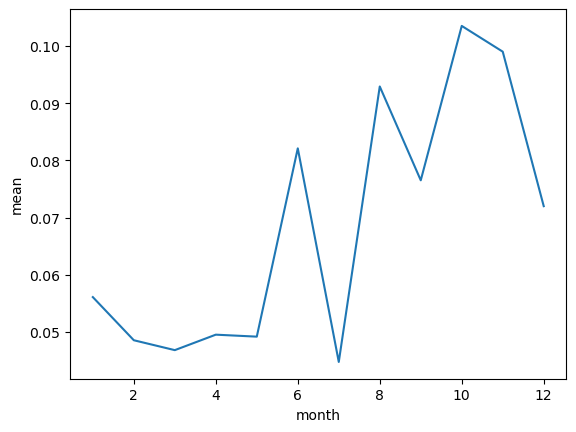

In [214]:
# look at monthly aggreate patterns for 1 year
sns.lineplot(x='month',y='mean',data=ammonia_subset_plot,errorbar=('ci',95))

Kjeldahl units are a measurement of nitrogen that typically represents concentrations of organic Nitrogen. It is an engineered measurement, where a water sample is treated with a catalytic agent to convert nitrogen into ammonia, similar to the decomposition process.

In [215]:
# Isolation kjedahl measurements
kjedahl=nitrogen_1990[nitrogen_1990.Characteristic.str.contains('Kjeld')]
print(kjedahl.shape)
kjedahl.head(5)

(362, 17)


DataSourceName DataSourceCode StationID  ActualStationID  \
25672  EPC Water Quality Data       HCEPC_WQ        55              NaN   
25735  EPC Water Quality Data       HCEPC_WQ         7              NaN   
25736  EPC Water Quality Data       HCEPC_WQ         7              NaN   
25739  EPC Water Quality Data       HCEPC_WQ        70              NaN   
25884  EPC Water Quality Data       HCEPC_WQ         6              NaN   

        Latitude  Longitude SampleDate SampleTime  ActivityDepth  \
25672  27.849166 -82.431385 1990-04-11    0:00:00           2.59   
25735  27.858887 -82.468609 1990-02-14    0:00:00           1.68   
25736  27.858887 -82.468609 1990-08-15    0:00:00           2.13   
25739  27.908888 -82.463055 1990-07-18    0:00:00           1.52   
25884  27.889443 -82.477497 1990-07-18    0:00:00           1.98   

      ActivityDepthUnit      Characteristic  ResultValue ResultUnit  \
25672               m    Nitrogen, Kjeldahl         0.60       mg/l   
25735               m    Nitrogen, Kjeldahl         1.13       mg/l   
25736               m    Nitrogen, Kjeldahl         0.76       mg/l   
25739               m    Nitrogen, Kjeldahl         0.38       mg/l   
25884               m    Nitrogen, Kjeldahl         0.61       mg/l   

      ValueQualifier ResultComment  WaterbodyID     WaterbodyName  
25672            NaN           NaN        20005  Hillsborough Bay  
25735            NaN           NaN        20005  Hillsborough Bay  
25736            NaN           NaN        20005  Hillsborough Bay  
25739            NaN           NaN        20005  Hillsborough Bay  
25884            NaN           NaN        20005  Hillsborough Bay

In [216]:
print(kjedahl.ResultUnit.isna().value_counts())
kjedahl.ResultUnit.value_counts()

ResultUnit
False    340
True      22
Name: count, dtype: int64


ResultUnit
mg/l    170
ug/l    170
Name: count, dtype: int64

In [217]:
# Look at units
kjedahl[kjedahl.ResultUnit=='ug/l'].head()

DataSourceName          DataSourceCode StationID  \
26914  EPC Monthly Routine Water Monitoring  EPC_ROUTINE_MONITORING         6   
27002  EPC Monthly Routine Water Monitoring  EPC_ROUTINE_MONITORING         6   
27034  EPC Monthly Routine Water Monitoring  EPC_ROUTINE_MONITORING         6   
27062  EPC Monthly Routine Water Monitoring  EPC_ROUTINE_MONITORING         6   
27093  EPC Monthly Routine Water Monitoring  EPC_ROUTINE_MONITORING         6   

       ActualStationID   Latitude  Longitude SampleDate SampleTime  \
26914              NaN  27.889299 -82.477402 1990-12-11   10:00:00   
27002              NaN  27.889299 -82.477402 1990-10-10   10:30:00   
27034              NaN  27.889299 -82.477402 1990-09-12   10:33:00   
27062              NaN  27.889299 -82.477402 1990-08-15   10:29:00   
27093              NaN  27.889299 -82.477402 1990-07-18   10:18:00   

       ActivityDepth ActivityDepthUnit      Characteristic  ResultValue  \
26914            1.6                 m  Nitrogen, Kjeldahl    460.00001   
27002            1.7                 m  Nitrogen, Kjeldahl    479.99999   
27034            1.8                 m  Nitrogen, Kjeldahl    649.99998   
27062            2.0                 m  Nitrogen, Kjeldahl    810.00000   
27093            2.0                 m  Nitrogen, Kjeldahl    610.00001   

      ResultUnit ValueQualifier ResultComment  WaterbodyID     WaterbodyName  
26914       ug/l            NaN           NaN        20005  Hillsborough Bay  
27002       ug/l            NaN           NaN        20005  Hillsborough Bay  
27034       ug/l            NaN           NaN        20005  Hillsborough Bay  
27062       ug/l            NaN           NaN        20005  Hillsborough Bay  
27093       ug/l            NaN           NaN        20005  Hillsborough Bay

In [218]:
# std. kjel units
for i in kjedahl.index:
    if kjedahl.loc[i,'ResultUnit']=='ug/l':
        kjedahl.loc[i,'ResultValue']=kjedahl.loc[i,'ResultValue']/1000
        kjedahl.loc[i,'ResultUnit']='mg/l'
        #ammonia1990.ResultValue=ammonia1990.ResultValue/1000

In [219]:
kjedahl.reset_index(drop=True,inplace=True)
kjedahl.sort_values(by='SampleDate').reset_index(drop=True,inplace=True)

In [220]:
#date format
kjedahl['month']=kjedahl.SampleDate.dt.month

C:\Users\Ajax\AppData\Local\Temp\ipykernel_84184\1304643865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kjedahl['month']=kjedahl.SampleDate.dt.month


In [221]:
# isolate kjel features of interest
kjedahl_subset=kjedahl[['DataSourceName','StationID','SampleDate','SampleTime','ResultValue','ResultUnit','Latitude','Longitude','month']]

In [222]:
# sanity check
kjedahl_subset.head(5)

DataSourceName StationID SampleDate SampleTime  ResultValue  \
0  EPC Water Quality Data        55 1990-04-11    0:00:00         0.60   
1  EPC Water Quality Data         7 1990-02-14    0:00:00         1.13   
2  EPC Water Quality Data         7 1990-08-15    0:00:00         0.76   
3  EPC Water Quality Data        70 1990-07-18    0:00:00         0.38   
4  EPC Water Quality Data         6 1990-07-18    0:00:00         0.61   

  ResultUnit   Latitude  Longitude  month  
0       mg/l  27.849166 -82.431385      4  
1       mg/l  27.858887 -82.468609      2  
2       mg/l  27.858887 -82.468609      8  
3       mg/l  27.908888 -82.463055      7  
4       mg/l  27.889443 -82.477497      7

In [223]:
# search for inconsistent values, outlier values
kjedahl_subset[kjedahl_subset.ResultValue>2]

DataSourceName    StationID SampleDate  \
235  USGS National Water Information System  2.75134E+14 1990-05-31   
236  USGS National Water Information System  2.75134E+14 1990-05-31   
237  USGS National Water Information System  2.75134E+14 1990-05-31   
238  USGS National Water Information System  2.75134E+14 1990-05-31   
239  USGS National Water Information System  2.75134E+14 1990-05-31   
240  USGS National Water Information System  2.75134E+14 1990-05-31   
241  USGS National Water Information System  2.75134E+14 1990-05-31   
245  USGS National Water Information System  2.75134E+14 1990-02-07   
246  USGS National Water Information System  2.75134E+14 1990-02-07   
247  USGS National Water Information System  2.75134E+14 1990-04-16   
248  USGS National Water Information System  2.75134E+14 1990-05-23   
249  USGS National Water Information System  2.75134E+14 1990-05-23   
250  USGS National Water Information System  2.75134E+14 1990-06-19   
251  USGS National Water Information System  2.75134E+14 1990-06-19   
252  USGS National Water Information System  2.75134E+14 1990-07-23   
253  USGS National Water Information System  2.75134E+14 1990-07-23   
254  USGS National Water Information System  2.75134E+14 1990-08-15   
255  USGS National Water Information System  2.75134E+14 1990-08-15   
256  USGS National Water Information System  2.75134E+14 1990-09-26   
257  USGS National Water Information System  2.75134E+14 1990-09-26   
258  USGS National Water Information System  2.75134E+14 1990-11-15   
259  USGS National Water Information System  2.75134E+14 1990-11-15   

    SampleTime  ResultValue ResultUnit   Latitude  Longitude  month  
235    0:00:00        520.0        NaN  27.859747 -82.451205      5  
236    0:00:00        530.0        NaN  27.859747 -82.451205      5  
237    0:00:00        560.0        NaN  27.859747 -82.451205      5  
238    0:00:00        570.0        NaN  27.859747 -82.451205      5  
239    0:00:00        580.0        NaN  27.859747 -82.451205      5  
240    0:00:00        890.0        NaN  27.859747 -82.451205      5  
241    0:00:00        910.0        NaN  27.859747 -82.451205      5  
245    0:00:00        540.0        NaN  27.859747 -82.451205      2  
246    0:00:00        580.0        NaN  27.859747 -82.451205      2  
247    0:00:00        700.0        NaN  27.859747 -82.451205      4  
248    0:00:00        430.0        NaN  27.859747 -82.451205      5  
249    0:00:00        520.0        NaN  27.859747 -82.451205      5  
250    0:00:00        430.0        NaN  27.859747 -82.451205      6  
251    0:00:00        440.0        NaN  27.859747 -82.451205      6  
252    0:00:00        650.0        NaN  27.859747 -82.451205      7  
253    0:00:00        690.0        NaN  27.859747 -82.451205      7  
254    0:00:00        750.0        NaN  27.859747 -82.451205      8  
255    0:00:00        770.0        NaN  27.859747 -82.451205      8  
256    0:00:00        540.0        NaN  27.859747 -82.451205      9  
257    0:00:00        560.0        NaN  27.859747 -82.451205      9  
258    0:00:00        550.0        NaN  27.859747 -82.451205     11  
259    0:00:00        590.0        NaN  27.859747 -82.451205     11

In [224]:
# Kjeldahl measurements are typically higher than that of NO3 or NH4 - mg/l were initially chosen here.
# NO3 and NH4 were later standardized to mg/l when processing the full dataset
# std. units to mg/l
for i in kjedahl.index:
    if kjedahl_subset.loc[i,'ResultValue']>2:
            kjedahl_subset.loc[i,'ResultValue']=kjedahl_subset.loc[i,'ResultValue']/1000
            kjedahl_subset.loc[i,'ResultUnit']='mg/l'
        #ammonia1990.ResultValue=ammonia1990.ResultValue/1000

In [225]:
# monthly aggregations to look at subset annual pattern
kjedahl_subset_plot=kjedahl_subset.groupby('month').ResultValue.agg(['mean','std','max','min'])
kjedahl_subset_plot.head(12)

mean       std   max   min
month                                
1      0.801200  0.158465  1.04  0.35
2      1.025000  0.164102  1.22  0.54
3      0.802500  0.162791  1.17  0.62
4      0.721724  0.126324  0.90  0.51
5      0.840976  0.224853  1.23  0.43
6      0.378462  0.072757  0.46  0.25
7      0.514074  0.131274  0.73  0.34
8      0.688286  0.078870  0.81  0.56
9      0.592121  0.084549  0.71  0.42
10     0.489655  0.044198  0.67  0.43
11     0.492903  0.055689  0.59  0.37
12     0.468571  0.065190  0.67  0.37

<Axes: xlabel='month', ylabel='mean'>

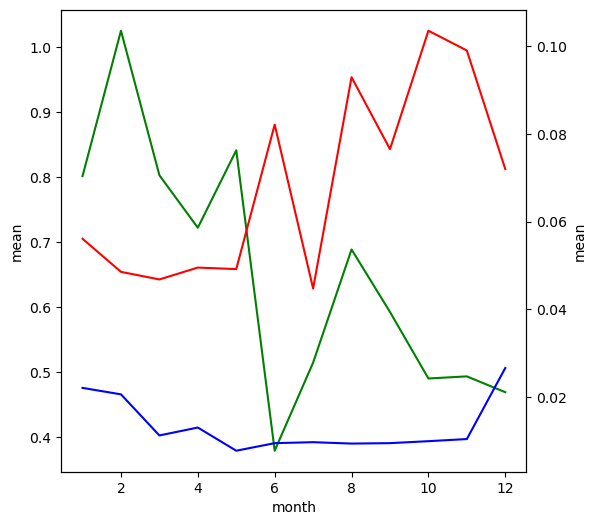

In [226]:
# Patterns
fig,ax=plt.subplots(figsize=(6,6))
sns.lineplot(x='month',y='mean',data=kjedahl_subset_plot,errorbar=('ci',.95),color='green',ax=ax)
ax1=ax.twinx()
sns.lineplot(x='month',y='mean',data=ammonia_subset_plot,errorbar=('ci',.95),color='red',ax=ax1)
sns.lineplot(x='month',y='mean',data=nitrate_subset_plot,errorbar=('ci',.95),color='blue',ax=ax1)

#### Processing Full Nitrate Dataset

In [227]:
hbconcat=hbwq[['DataSourceName','StationID','Latitude','Longitude','SampleDate','SampleTime','Characteristic','ResultUnit','ResultValue','WaterbodyName']]
hbconcat.head(3)

DataSourceName    StationID   Latitude  \
0  FDEP Southwest Regional Operations Center  2.74734E+14  27.792639   
1  FDEP Southwest Regional Operations Center  2.74734E+14  27.792639   
2  FDEP Southwest Regional Operations Center  2.74734E+14  27.792639   

   Longitude SampleDate SampleTime    Characteristic ResultUnit  ResultValue  \
0 -82.413861 2006-04-25    0:00:00         Fluorides       mg/l          1.0   
1 -82.413861 2006-04-25    0:00:00    Fecal Coliform  cfu/100ml         10.0   
2 -82.413861 2006-04-25    0:00:00  Dissolved Solids       mg/l      27200.0   

      WaterbodyName  
0  Hillsborough Bay  
1  Hillsborough Bay  
2  Hillsborough Bay

In [228]:
# Daily sample times are not relevant. setting to constant to avoid bad aggregations
mtbwq['SampleTime']='0:00:00'

In [229]:
mtbwq.head(1)

WBodyID     WaterBodyName DataSource        StationID        StationName  \
0    20007  Middle Tampa Bay  USGS_NWIS  274237082325800   10F TAMPA BAY 11   

     Actual_StationID   Latitude  Longitude DEP_WBID SampleDate  ...  \
0  ="274237082325800"  27.710586 -82.549263    1558B 1972-07-10  ...   

   Parameter Characteristic Sample_Fraction Result_Value Result_Unit  QACode  \
0     Cl_mgl       Chloride             NaN      18000.0         NaN     NaN   

  Result_Comment Original_Result_Value Original_Result_Unit SampleTime  
0            NaN                 18000                 mg/l    0:00:00  

[1 rows x 22 columns]

In [230]:
# isolate features
mtbconcat=mtbwq[['DataSource','StationID','Latitude','Longitude','SampleDate','SampleTime','Characteristic','Result_Unit','Result_Value','WaterBodyName']]
mtbconcat.head(3)

DataSource        StationID   Latitude  Longitude SampleDate SampleTime  \
0  USGS_NWIS  274237082325800  27.710586 -82.549263 1972-07-10    0:00:00   
1  USGS_NWIS  274237082325800  27.710586 -82.549263 1972-07-10    0:00:00   
2  USGS_NWIS  274237082325800  27.710586 -82.549263 1972-07-10    0:00:00   

           Characteristic Result_Unit  Result_Value     WaterBodyName  
0                Chloride         NaN       18000.0  Middle Tampa Bay  
1  Nitrogen, ammonia as N         NaN         550.0  Middle Tampa Bay  
2  Nitrogen, ammonia as N         NaN         580.0  Middle Tampa Bay

In [231]:
# null check
mtbconcat.DataSource.isna().value_counts()

DataSource
False    544257
Name: count, dtype: int64

In [232]:
# rename units to match HB
mtbconcat.rename(columns={'WaterBodyName':'WaterbodyName','DataSource':'DataSourceName','Result_Unit':'ResultUnit','Result_Value':'ResultValue'},inplace=True)
mtbconcat.head(1)

C:\Users\Ajax\AppData\Local\Temp\ipykernel_84184\600712440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mtbconcat.rename(columns={'WaterBodyName':'WaterbodyName','DataSource':'DataSourceName','Result_Unit':'ResultUnit','Result_Value':'ResultValue'},inplace=True)


DataSourceName        StationID   Latitude  Longitude SampleDate SampleTime  \
0      USGS_NWIS  274237082325800  27.710586 -82.549263 1972-07-10    0:00:00   

  Characteristic ResultUnit  ResultValue     WaterbodyName  
0       Chloride        NaN      18000.0  Middle Tampa Bay

In [233]:
# Union HB and MTB into 1 df
combwq=pd.concat([hbconcat,mtbconcat])
combwq.head(5)

DataSourceName    StationID   Latitude  \
0  FDEP Southwest Regional Operations Center  2.74734E+14  27.792639   
1  FDEP Southwest Regional Operations Center  2.74734E+14  27.792639   
2  FDEP Southwest Regional Operations Center  2.74734E+14  27.792639   
3  FDEP Southwest Regional Operations Center  2.74734E+14  27.792639   
4  FDEP Southwest Regional Operations Center  2.74734E+14  27.792639   

   Longitude SampleDate SampleTime               Characteristic   ResultUnit  \
0 -82.413861 2006-04-25    0:00:00                    Fluorides         mg/l   
1 -82.413861 2006-04-25    0:00:00               Fecal Coliform    cfu/100ml   
2 -82.413861 2006-04-25    0:00:00             Dissolved Solids         mg/l   
3 -82.413861 2006-04-25    0:00:00  Dissolved oxygen saturation  percent (%)   
4 -82.413861 2006-04-25    0:00:00        Dissolved oxygen (DO)         mg/l   

   ResultValue     WaterbodyName  
0         1.00  Hillsborough Bay  
1        10.00  Hillsborough Bay  
2     27200.00  Hillsborough Bay  
3        80.80  Hillsborough Bay  
4         4.68  Hillsborough Bay

In [234]:
# check nitrogen compounds isolated
combwq[combwq.Characteristic.str.contains('Nit')==True].Characteristic.value_counts()

Characteristic
Nitrogen, Kjeldahl                                       44832
Nitrogen, ammonia as N                                   41417
Nitrogen                                                 35759
Nitrogen, Nitrite (NO2) + Nitrate (NO3) as N             34215
Nitrogen, organic                                        31881
Nitrogen, Nitrate (NO3) as N                              5422
Nitrogen, ammonia (NH3) + ammonium (NH4)                  2157
Nitrogen, Nitrite (NO2) as N                               560
Nitrogen, Ammonium (NH4) as N                               28
Nitrogen, mixed forms (NH3)+(NH4)+organic+(NO2)+(NO3)       14
Nitrogen, ammonium (NH4) as N                                5
Name: count, dtype: int64

In [235]:
combwq.shape

(1592832, 10)

In [236]:
# Export data for processing outside of notebook
combwq.to_csv('NIT_FINAL.csv')

In [237]:
### There was one sampling station / service that was producing highly irregular nitrate values
### I suspect that they were correct - but there were so few measurements that, as significant outliers, it was better
### to remove them from the dataset. They were orders higher.

### Samples for this station from all datasets needs to be removed
combwq.drop(combwq[combwq.StationID=='560'].index,inplace=True)

In [238]:
#Checking to ensure iso of nitrates
combwq[combwq.Characteristic.str.lower().str.contains('nitra','nitri')==True]

DataSourceName    StationID   Latitude  \
18      FDEP Southwest Regional Operations Center  2.74734E+14  27.792639   
81      FDEP Southwest Regional Operations Center  2.74734E+14  27.792639   
89      FDEP Southwest Regional Operations Center  2.74734E+14  27.792639   
116     FDEP Southwest Regional Operations Center  2.74734E+14  27.792639   
159     FDEP Southwest Regional Operations Center  2.74734E+14  27.792639   
...                                           ...          ...        ...   
544162                                   PINELLAS           E6  27.811150   
544176                                   PINELLAS           E6  27.791200   
544196                                   PINELLAS           E6  27.791200   
544236                                 WIN_21FLGW        59865  27.758901   
544251                                 WIN_21FLGW        59865  27.758901   

        Longitude          SampleDate SampleTime  \
18     -82.413861 2006-10-03 00:00:00    0:00:00   
81     -82.413861 2006-10-10 00:00:00    0:00:00   
89     -82.413861 2006-03-06 00:00:00    0:00:00   
116    -82.413861 2006-02-14 00:00:00    0:00:00   
159    -82.413861 2006-11-07 00:00:00    0:00:00   
...           ...                 ...        ...   
544162 -82.594590 2012-12-05 11:11:00    0:00:00   
544176 -82.607350 2012-12-05 11:56:00    0:00:00   
544196 -82.607350 2012-12-05 11:56:00    0:00:00   
544236 -82.428693 2022-01-19 00:00:00    0:00:00   
544251 -82.428693 2022-01-19 00:00:00    0:00:00   

                                      Characteristic ResultUnit  ResultValue  \
18      Nitrogen, Nitrite (NO2) + Nitrate (NO3) as N       ug/l        5.000   
81      Nitrogen, Nitrite (NO2) + Nitrate (NO3) as N       ug/l        4.000   
89      Nitrogen, Nitrite (NO2) + Nitrate (NO3) as N       ug/l       32.000   
116     Nitrogen, Nitrite (NO2) + Nitrate (NO3) as N       ug/l       14.000   
159     Nitrogen, Nitrite (NO2) + Nitrate (NO3) as N       ug/l        8.000   
...                                              ...        ...          ...   
544162  Nitrogen, Nitrite (NO2) + Nitrate (NO3) as N        NaN       20.000   
544176  Nitrogen, Nitrite (NO2) + Nitrate (NO3) as N        NaN       20.000   
544196  Nitrogen, Nitrite (NO2) + Nitrate (NO3) as N       mg/l        0.020   
544236  Nitrogen, Nitrite (NO2) + Nitrate (NO3) as N       ug/l       25.000   
544251  Nitrogen, Nitrite (NO2) + Nitrate (NO3) as N       mg/l        0.025   

           WaterbodyName  
18      Hillsborough Bay  
81      Hillsborough Bay  
89      Hillsborough Bay  
116     Hillsborough Bay  
159     Hillsborough Bay  
...                  ...  
544162  Middle Tampa Bay  
544176  Middle Tampa Bay  
544196  Middle Tampa Bay  
544236  Middle Tampa Bay  
544251  Middle Tampa Bay  

[39588 rows x 10 columns]

In [239]:
combwq[combwq.Characteristic.str.lower().str.contains('nitra','nitri')==True].shape

(39588, 10)

In [240]:
# Isolate each compound of interest
nitrates=combwq[combwq.Characteristic.str.lower().str.contains('nitra','nitri')==True]
kjeldahl=combwq[combwq.Characteristic.str.lower().str.contains('kjel')==True]
ammonia=combwq[combwq.Characteristic.str.lower().str.contains('ammo')==True]

In [241]:
print(nitrates.shape)
print(kjeldahl.shape)
print(ammonia.shape)

(39588, 10)
(44774, 10)
(43553, 10)


In [242]:
# Select only mg/l units
nitrates_mg=nitrates[nitrates.ResultUnit=='mg/l']
kjeldahl_mg=kjeldahl[kjeldahl.ResultUnit=='mg/l']
ammonia_mg=ammonia[ammonia.ResultUnit=='mg/l']

In [243]:
# sample size reduced. Many rows were duplicates using the other measurement unit.
print(nitrates_mg.shape)
print(kjeldahl_mg.shape)
print(ammonia_mg.shape)

(19650, 10)
(22302, 10)
(22151, 10)


In [244]:
# drop null values. Not imputing anything yet
nitrates_mg.dropna(inplace=True)
kjeldahl_mg.dropna(inplace=True)
ammonia_mg.dropna(inplace=True)
print(nitrates_mg.shape)
print(kjeldahl_mg.shape)
print(ammonia_mg.shape)

(19527, 10)
(22291, 10)
(22074, 10)


C:\Users\Ajax\AppData\Local\Temp\ipykernel_84184\1778963100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nitrates_mg.dropna(inplace=True)
C:\Users\Ajax\AppData\Local\Temp\ipykernel_84184\1778963100.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kjeldahl_mg.dropna(inplace=True)
C:\Users\Ajax\AppData\Local\Temp\ipykernel_84184\1778963100.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ammonia_mg.dropna(inplace=True)


In [245]:
nitrates_mg.ResultValue.isna().value_counts()

ResultValue
False    19527
Name: count, dtype: int64

In [246]:
ammonia_mg.ResultValue.isna().value_counts()

ResultValue
False    22074
Name: count, dtype: int64

In [247]:
kjeldahl_mg.ResultValue.isna().value_counts()

ResultValue
False    22291
Name: count, dtype: int64

In [248]:
# Checking for outliers
ammoniasub[ammoniasub.ResultValue>2]

Empty DataFrame
Columns: [DataSourceName, StationID, SampleDate, SampleTime, ResultValue, ResultUnit, Latitude, Longitude, month, year, day, DateMonth]
Index: []

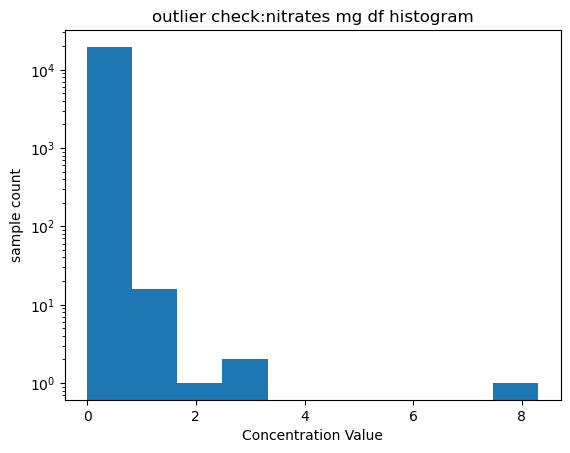

In [249]:
# distribution checks. log scale
plt.hist(nitrates_mg.ResultValue)
plt.yscale('log')
plt.ylabel('sample count')
plt.xlabel('Concentration Value')
plt.title('outlier check:nitrates mg df histogram')
plt.show()

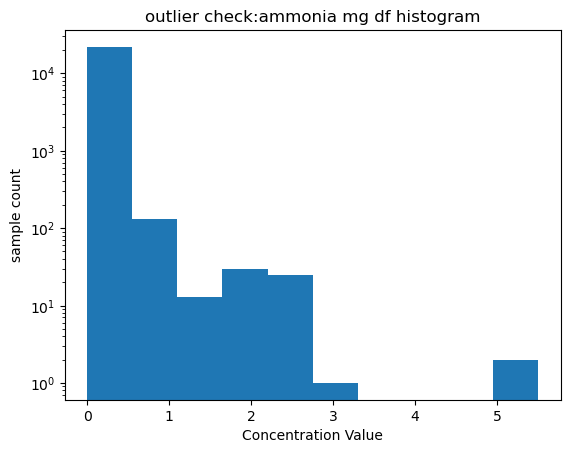

In [250]:
# distribution checks. log scale

plt.hist(ammonia_mg.ResultValue)
plt.yscale('log')
plt.ylabel('sample count')
plt.xlabel('Concentration Value')
plt.title('outlier check:ammonia mg df histogram')
plt.show()

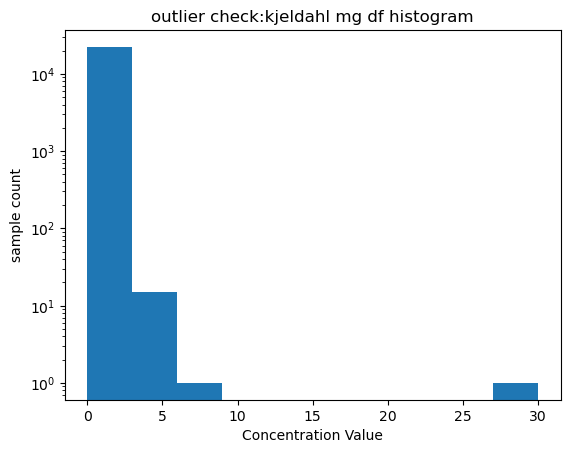

In [251]:
# distribution checks. log scale

plt.hist(kjeldahl_mg.ResultValue)
plt.yscale('log')
plt.ylabel('sample count')
plt.xlabel('Concentration Value')
plt.title('outlier check:kjeldahl mg df histogram')
plt.show()

In [252]:
## This value will get removed when the dataset time period is reduced
kjeldahl_mg[kjeldahl_mg.ResultValue>10]

DataSourceName        StationID   Latitude  Longitude SampleDate  \
205105  LEGACYSTORET_21FLA  24020904         27.812694 -82.484278 1975-05-28   

       SampleTime      Characteristic ResultUnit  ResultValue  \
205105    0:00:00  Nitrogen, Kjeldahl       mg/l         30.0   

           WaterbodyName  
205105  Middle Tampa Bay

In [253]:
nitrates_mg_temp=nitrates_mg.reset_index()
#nitrates_mg[nitrates_mg.ResultValue>3].reset_index()
nit_iloc=nitrates_mg_temp[nitrates_mg_temp.ResultValue>2.5].index
for i in nit_iloc:
    nitrates_mg.iloc[i,-2]=nitrates_mg.iloc[i,-2]/1000

In [254]:
# standardize units
kjeldahl_mg['month']=kjeldahl_mg.SampleDate.dt.month
ammonia_mg['month']=ammonia_mg.SampleDate.dt.month
nitrates_mg['month']=nitrates_mg.SampleDate.dt.month

C:\Users\Ajax\AppData\Local\Temp\ipykernel_84184\666384419.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kjeldahl_mg['month']=kjeldahl_mg.SampleDate.dt.month
C:\Users\Ajax\AppData\Local\Temp\ipykernel_84184\666384419.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ammonia_mg['month']=ammonia_mg.SampleDate.dt.month
C:\Users\Ajax\AppData\Local\Temp\ipykernel_84184\666384419.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [255]:
# Isolate features of interest
kjeldahlsub=kjeldahl_mg[['DataSourceName','StationID','SampleDate','SampleTime','ResultValue','ResultUnit','Latitude','Longitude','month']]
ammoniasub=ammonia_mg[['DataSourceName','StationID','SampleDate','SampleTime','ResultValue','ResultUnit','Latitude','Longitude','month']]
nitratesub=nitrates_mg[['DataSourceName','StationID','SampleDate','SampleTime','ResultValue','ResultUnit','Latitude','Longitude','month']]

In [256]:
# Using a temp table to work around coding errors
# Looking at outlier data. Assess whether unit conv was issue
index_amm_temp=ammoniasub[ammoniasub.ResultValue>3].index
ammoniasub.loc[index_amm_temp].ResultValue=ammoniasub.loc[index_amm_temp].ResultValue/1000

In [257]:
# station suspected culprit for outlier values
kjeldahl_mg[kjeldahl_mg.StationID=='560']

Empty DataFrame
Columns: [DataSourceName, StationID, Latitude, Longitude, SampleDate, SampleTime, Characteristic, ResultUnit, ResultValue, WaterbodyName, month]
Index: []

In [258]:
# create year col
kjeldahlsub['year']=kjeldahlsub.SampleDate.dt.year
ammoniasub['year']=ammoniasub.SampleDate.dt.year
nitratesub['year']=nitratesub.SampleDate.dt.year

C:\Users\Ajax\AppData\Local\Temp\ipykernel_84184\742156538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kjeldahlsub['year']=kjeldahlsub.SampleDate.dt.year
C:\Users\Ajax\AppData\Local\Temp\ipykernel_84184\742156538.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ammoniasub['year']=ammoniasub.SampleDate.dt.year
C:\Users\Ajax\AppData\Local\Temp\ipykernel_84184\742156538.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [259]:
# creating a col that sets all months to a starting day of 1
kjeldahlsub['day']=1
ammoniasub['day']=1
nitratesub['day']=1

In [260]:
# format dt
kjeldahlsub['DateMonth']=pd.to_datetime(kjeldahlsub.astype(str).month+'-'+kjeldahlsub.astype(str).day+'-'+kjeldahlsub.astype(str).year)
ammoniasub['DateMonth']=pd.to_datetime(ammoniasub.astype(str).month+'-'+ammoniasub.astype(str).day+'-'+ammoniasub.astype(str).year)
nitratesub['DateMonth']=pd.to_datetime(nitratesub.astype(str).month+'-'+nitratesub.astype(str).day+'-'+nitratesub.astype(str).year)

In [261]:
# isolate dataset to years of interest in the study
kjeldahlsub=kjeldahlsub[kjeldahlsub.year>1989]
nitratesub=nitratesub[nitratesub.year>1989]
ammoniasub=ammoniasub[ammoniasub.year>1989]

In [262]:
# create better date column
nitratesub.SampleDate=pd.to_datetime(nitratesub.SampleDate.astype(str).str.slice(0,10))
kjeldahlsub.SampleDate=pd.to_datetime(kjeldahlsub.SampleDate.astype(str).str.slice(0,10))
ammoniasub.SampleDate=pd.to_datetime(ammoniasub.SampleDate.astype(str).str.slice(0,10))

In [263]:
#outlier check
kjeldahlsub[kjeldahlsub.ResultValue>4]

DataSourceName StationID SampleDate SampleTime  \
168160                       Tampa Bay Water       M34 2009-07-27    0:00:00   
425580  EPC Monthly Routine Water Monitoring        70 1994-10-11   11:05:00   
439741                EPC Water Quality Data        70 1994-10-11    0:00:00   
86822                 EPC_ROUTINE_MONITORING       136 2003-08-13    0:00:00   
100452                              HCEPC_WQ       136 2003-08-13    0:00:00   
191363                              HCEPC_WQ        19 1998-06-23    0:00:00   
310031                EPC_ROUTINE_MONITORING        19 1998-06-23    0:00:00   

        ResultValue ResultUnit   Latitude  Longitude  month  year  day  \
168160       6.2000       mg/l  27.928000 -82.415000      7  2009    1   
425580       4.1300       mg/l  27.908899 -82.463203     10  1994    1   
439741       4.1300       mg/l  27.908888 -82.463055     10  1994    1   
86822        4.0600       mg/l  27.680000 -82.499199      8  2003    1   
100452       4.0600       mg/l  27.680000 -82.499200      8  2003    1   
191363       4.9357       mg/l  27.693300 -82.555800      6  1998    1   
310031       4.9400       mg/l  27.693399 -82.555901      6  1998    1   

        DateMonth  
168160 2009-07-01  
425580 1994-10-01  
439741 1994-10-01  
86822  2003-08-01  
100452 2003-08-01  
191363 1998-06-01  
310031 1998-06-01

**Only Kjeldahl in the filtered dataset follow a normal distribution, whereas Nitrates and Ammonia are heavily right-skew**
<br>

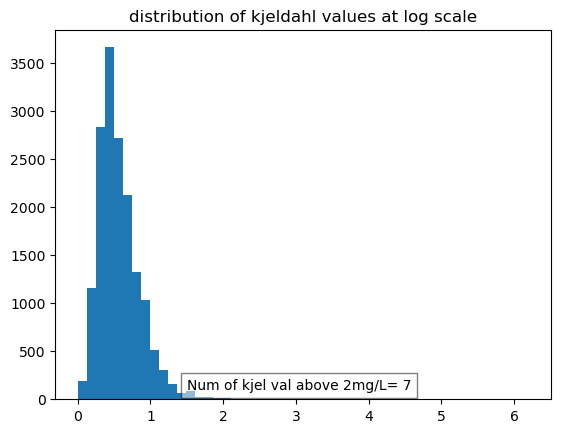

In [264]:
### Only Kjeldahl has a normal distribution

plt.hist(kjeldahlsub.ResultValue,bins=50)
#"plt.yscale('log')
plt.title('distribution of kjeldahl values at log scale')
plt.text(1.5, 100, f'Num of kjel val above 2mg/L= {kjeldahlsub[kjeldahlsub.ResultValue>4].ResultValue.count()}', bbox=dict(facecolor='white', alpha=0.5))
plt.show()

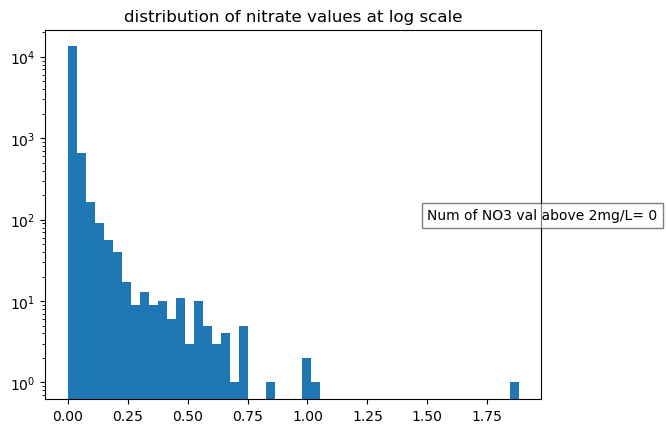

In [265]:
plt.hist(nitratesub.ResultValue,bins=50)
plt.yscale('log')
plt.title('distribution of nitrate values at log scale')
plt.text(1.5, 100, f'Num of NO3 val above 2mg/L= {nitratesub[nitratesub.ResultValue>2].ResultValue.count()}', bbox=dict(facecolor='white', alpha=0.5))
plt.show()

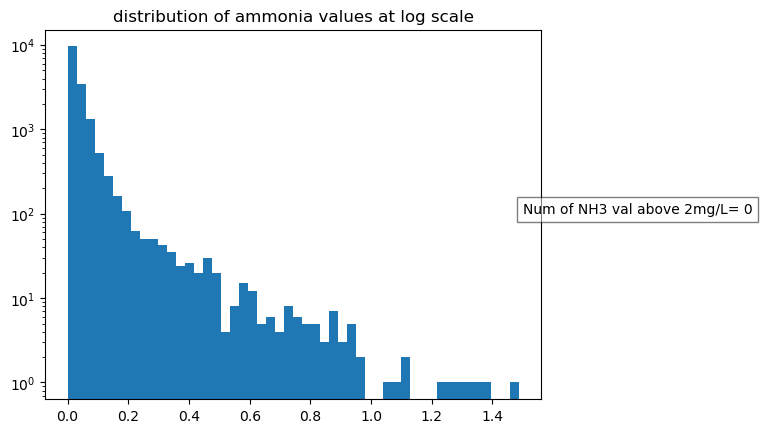

In [266]:
plt.hist(ammoniasub.ResultValue,bins=50)
plt.yscale('log')
plt.title('distribution of ammonia values at log scale')
plt.text(1.5, 100, f'Num of NH3 val above 2mg/L= {ammoniasub[ammoniasub.ResultValue>2].ResultValue.count()}', bbox=dict(facecolor='white', alpha=0.5))
plt.show()

In [267]:
# Setting checkpoint
ksub=kjeldahlsub.copy()
asub=ammoniasub.copy()
nsub=nitratesub.copy()

In [268]:
# Adding some columns to standardize dates and make next steps easier

ksub['week']=ksub.SampleDate.dt.isocalendar().week
asub['week']=asub.SampleDate.dt.isocalendar().week
nsub['week']=nsub.SampleDate.dt.isocalendar().week
ksub['adj_date']=pd.to_datetime(ksub['year'].astype(str) + '-W' + ksub['week'].astype(str) + '-1', format='%Y-W%W-%w')
asub['adj_date']=pd.to_datetime(asub['year'].astype(str) + '-W' + asub['week'].astype(str) + '-1', format='%Y-W%W-%w')
nsub['adj_date']=pd.to_datetime(nsub['year'].astype(str) + '-W' + nsub['week'].astype(str) + '-1', format='%Y-W%W-%w')
ksub.drop(columns='DateMonth',inplace=True)
asub.drop(columns='DateMonth',inplace=True)
nsub.drop(columns='DateMonth',inplace=True)
ksub.sort_values(by='SampleDate',inplace=True)
asub.sort_values(by='SampleDate',inplace=True)
nsub.sort_values(by='SampleDate',inplace=True)

In [269]:
# There are missing weeks that need to be imputed. This should be weekly data from 1990-2024
# Creating a df with all weeks, including missing values. Will outer join all nitrate groups, remove duplicates, impute or interpolate missing values
data = []
for year in range(1990, 2025):  # 24 years from 1990 to 2024
    for week in range(1, 53):  # Weeks 1 to 52
        data.append([year, week])
weekly=pd.DataFrame(data=data,columns=['year','week'])
weekly['adj_date']=pd.to_datetime(weekly['year'].astype(str) + '-W' + weekly['week'].astype(str) + '-1', format='%Y-W%W-%w')
print(len(data))
print(len(weekly))
print(weekly.min())
weekly.max()

1820
1820
year                       1990
week                          1
adj_date    1990-01-01 00:00:00
dtype: object


year                       2024
week                         52
adj_date    2024-12-23 00:00:00
dtype: object

In [270]:
# Make sure the datasets are as clean as possible (missing values dealt with later)
ksub.drop_duplicates(inplace=True)
asub.drop_duplicates(inplace=True)
nsub.drop_duplicates(inplace=True)

print(ksub.shape)
print(asub.shape)
print(nsub.shape)

(16150, 13)
(15779, 13)
(14303, 13)


In [271]:
# outer join kjeldahl df, no loss of data
test=weekly.merge(ksub,left_on=weekly.adj_date,right_on=ksub.adj_date,how='outer',suffixes=('_dt','_K'))

In [272]:
# adj_date_dt remains complete, dropping key_0
test.info()
test.drop(columns='key_0',inplace=True)
test.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16402 entries, 0 to 16401
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   key_0           16402 non-null  datetime64[ns]
 1   year_dt         16402 non-null  int64         
 2   week_dt         16402 non-null  int64         
 3   adj_date_dt     16402 non-null  datetime64[ns]
 4   DataSourceName  16150 non-null  object        
 5   StationID       16150 non-null  object        
 6   SampleDate      16150 non-null  datetime64[ns]
 7   SampleTime      16150 non-null  object        
 8   ResultValue     16150 non-null  float64       
 9   ResultUnit      16150 non-null  object        
 10  Latitude        16150 non-null  float64       
 11  Longitude       16150 non-null  float64       
 12  month           16150 non-null  float64       
 13  year_K          16150 non-null  float64       
 14  day             16150 non-null  float64       
 15  we

year_dt  week_dt adj_date_dt DataSourceName StationID SampleDate  \
0     1990        1  1990-01-01       HCEPC_WQ        32 1990-01-03   
1     1990        1  1990-01-01       HCEPC_WQ        13 1990-01-03   

  SampleTime  ResultValue ResultUnit  Latitude  Longitude  month  year_K  day  \
0    0:00:00         0.54       mg/l   27.7931   -82.5706    1.0  1990.0  1.0   
1    0:00:00         0.53       mg/l   27.8117   -82.5231    1.0  1990.0  1.0   

   week_K adj_date_K  
0       1 1990-01-01  
1       1 1990-01-01

In [273]:
# outer join ammonia results, no loss of data
# all units are standardized to mg/l
# need to keep key_0 as it's the only complete date column.
test2=test.merge(asub['ResultValue'],left_on=[test.adj_date_dt,test.DataSourceName,test.StationID],right_on=[asub.adj_date,asub.DataSourceName,asub.StationID],how='outer',suffixes=('_dt','_A')).drop_duplicates()
test2.rename(columns={'key_0':'adj_date'},inplace=True)
test2.drop(columns=['key_1','key_2'],inplace=True)

In [274]:
# outer join nitrate results, no loss of data
# all units are standardized to mg/l
# last merge

test3=test2.merge(nsub['ResultValue'],left_on=[test2.adj_date,test2.DataSourceName,test2.StationID],right_on=[nsub.adj_date,nsub.DataSourceName,nsub.StationID],how='outer',suffixes=('_dt','_N')).drop_duplicates()

In [275]:
test3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22461 entries, 0 to 25146
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   key_0           22461 non-null  datetime64[ns]
 1   key_1           20886 non-null  object        
 2   key_2           20886 non-null  object        
 3   adj_date        20439 non-null  datetime64[ns]
 4   year_dt         19116 non-null  float64       
 5   week_dt         19116 non-null  float64       
 6   adj_date_dt     19116 non-null  datetime64[ns]
 7   DataSourceName  18864 non-null  object        
 8   StationID       18864 non-null  object        
 9   SampleDate      18864 non-null  datetime64[ns]
 10  SampleTime      18864 non-null  object        
 11  ResultValue_dt  18864 non-null  float64       
 12  ResultUnit      18864 non-null  object        
 13  Latitude        18864 non-null  float64       
 14  Longitude       18864 non-null  float64       
 15  month  

In [276]:
# Isolate columns of interest
nmerge_stage=test3[test3.columns[[0,7,13,14,11,20,21]]]

In [277]:
nmerge_stage.head(1)

key_0          DataSourceName  Latitude  Longitude  ResultValue_dt  \
0 1990-01-01  EPC_ROUTINE_MONITORING   27.8118 -82.523201            0.53   

   ResultValue_A  ResultValue  
0           0.04        0.003

In [278]:
# Rename columns

nmerge_stage.columns=['date_adj','DataSourcveName','Lat','Long','ResultValue_K','ResultValue_A','ResultValue_N']
print(nmerge_stage.shape)
nmerge_stage.head(2)

(22461, 7)


date_adj         DataSourcveName      Lat       Long  ResultValue_K  \
0 1990-01-01  EPC_ROUTINE_MONITORING  27.8118 -82.523201           0.53   
1 1990-01-01  EPC_ROUTINE_MONITORING  27.7932 -82.570701           0.54   

   ResultValue_A  ResultValue_N  
0           0.04          0.003  
1           0.03          0.003

In [279]:
# Establish independent copy of merged base table
nmerge_base=nmerge_stage.copy()

In [280]:
nmerge_base[nmerge_base.ResultValue_N>2]

Empty DataFrame
Columns: [date_adj, DataSourcveName, Lat, Long, ResultValue_K, ResultValue_A, ResultValue_N]
Index: []

In [281]:
# Aggregate at weekly date intervals
nmerge_stage2=nmerge_stage.groupby('date_adj').agg({
    'ResultValue_K':'mean',
    'ResultValue_A':'mean',
    'ResultValue_N':'mean'
})

In [282]:
# Extra weeks beyond the end of the dataset (8/26/24)
# Cut out extra weeks
# Check for nulls
nmerge_stage3=nmerge_stage2.iloc[:-17,:]
nmerge_stage3.isna().sum()

ResultValue_K    235
ResultValue_A    246
ResultValue_N    248
dtype: int64

There are fewer missing values than expected! That's good, interpolation shouldn't be a problem. <br>
Seasonality shouldn't be expected for periods less than a month. <br>
Interpolation with 2 period in both directions should give best approximation of values.<br>

In [283]:
nmerge=nmerge_stage3.interpolate(method='linear', limit_direction='both', limit=2)

In [284]:
print(f'{nmerge.info()}\n\n\nSHAPE:\n{nmerge.shape}\n\n\n\nDESCRIBE:\n{nmerge.describe()}')
nmerge.head(2)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1803 entries, 1990-01-01 to 2024-08-26
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ResultValue_K  1803 non-null   float64
 1   ResultValue_A  1803 non-null   float64
 2   ResultValue_N  1803 non-null   float64
dtypes: float64(3)
memory usage: 56.3 KB
None


SHAPE:
(1803, 3)



DESCRIBE:
       ResultValue_K  ResultValue_A  ResultValue_N
count    1803.000000    1803.000000    1803.000000
mean        0.575472       0.055545       0.023528
std         0.298930       0.084185       0.033887
min         0.060000       0.000000       0.000000
25%         0.383333       0.018134       0.007000
50%         0.511389       0.030000       0.013895
75%         0.704722       0.056324       0.024015
max         3.030000       1.028308       0.430000


ResultValue_K  ResultValue_A  ResultValue_N
date_adj                                               
1990-01-01       0.583333       0.033333       0.006500
1990-01-08       0.723684       0.056842       0.022826

In [285]:
print(f'nmerge shape:\n {nmerge.shape}\n')
print(f'######\n\nMerge1 duplicates: \n{nmerge.duplicated().value_counts}\n\n######\nResultAction:')
if nmerge.duplicated().any():
    print('True.Duplicates, drop\n')
    nmerge.drop_duplicates(inplace=True)
else:
    print('False. No Duplicates, no drop\n')
print(f'######\n\nNulls:\n{nmerge.isna().sum()}\n')
print(f'######\nnew shape:{nmerge.shape}')
if nmerge.columns[0]=='key_0':
    print('Newly created key columns not dropped\nColumns now dropped')
    nmerge.drop(columns=nmerge.columns[[0,1,2]],inplace=True)
else:
    print('Columns not dropped')
nmerge.head(3)


nmerge shape:
 (1803, 3)

######

Merge1 duplicates: 
<bound method IndexOpsMixin.value_counts of date_adj
1990-01-01    False
1990-01-08    False
1990-01-15    False
1990-01-22    False
1990-01-29    False
              ...  
2024-07-29    False
2024-08-05    False
2024-08-12    False
2024-08-19    False
2024-08-26    False
Length: 1803, dtype: bool>

######
ResultAction:
False. No Duplicates, no drop

######

Nulls:
ResultValue_K    0
ResultValue_A    0
ResultValue_N    0
dtype: int64

######
new shape:(1803, 3)
Columns not dropped


ResultValue_K  ResultValue_A  ResultValue_N
date_adj                                               
1990-01-01       0.583333       0.033333       0.006500
1990-01-08       0.723684       0.056842       0.022826
1990-01-15       0.408333       0.071667       0.006500

In [286]:
# change directory for exporting of df
os.chdir('J:\\Brainstation\\BS Git\\human Imact\\Nutrient_loading')

In [287]:
ksub.to_csv('kjeldahl.csv')
nsub.to_csv('nitrate.csv')
asub.to_csv('ammonia.csv')
nmerge.to_csv('nit_merged_mean.csv')

In [ ]:
fig, ax = plt.subplots(figsize=(8,15))
ax1=ax.twinx()
plt.subplot(3,1,1)
nmerge.ResultValue_K.hist(color='g',label='Kjeldahl')
plt.subplot(3,1,2)
nmerge.ResultValue_A.hist(color='y',label='Ammonia')
plt.subplot(3,1,3)
nmerge.ResultValue_N.hist(color='r',label='Nitrate')
#plt.subplot(3,1,4)
plt.legend()
plt.suptitle('Distribution of Nitrogen Compounds Concentration Measurements')
plt.tight_layout()
plt.show()

In [ ]:
# fig,ax = plt.subplots(figsize=(8,8))

sns.lineplot(x=nmerge.index, y=nmerge.ResultValue_K, label='[Kjeldahl]',color='green',ax=ax)
#plt.xlabel*('Concentrations of Organic Nitrogen (Kjel)')
ax1=ax.twinx()
sns.lineplot(x=nmerge.index, y=nmerge.ResultValue_A, label='[Ammonia]',color='yellow',ax=ax1)
sns.lineplot(x=nmerge.index, y=nmerge.ResultValue_N, label='[Nitrates]',color='red',ax=ax1)
plt.title('Concentrations of Nitrogen compounds in Tampa Bay, 1990-2024')
plt.xlabel('Date')
plt.ylabel('Concentrations of Compounds (mg/l)')
plt.yscale('log')

In [ ]:
nmerge['K_moving_average'] = nmerge.ResultValue_K.rolling(window=36).mean()
nmerge['A_moving_average'] = nmerge.ResultValue_A.rolling(window=36).mean()
nmerge['N_moving_average'] = nmerge.ResultValue_N.rolling(window=36).mean()

In [ ]:
plt.figure(figsize=(7,7))
nmerge.ResultValue_K.plot(color='b')
nmerge.K_moving_average.plot(color='g',lw=4)
plt.yscale('log')
plt.show()

In [ ]:
plt.figure(figsize=(7,7))
nmerge.A_moving_average.plot(color='y',lw=4)
nmerge.N_moving_average.plot(color='r',lw=4)
plt.yscale('log')
plt.title('Log Scale Moving Average of Ammonia and Nitrate Nitrogen-compounds in Tampa Bay, 1990-2024')
plt.show()

Measurements of Nitrogen in Kjeldahl can be understood as measuerments of organic nitrogen found water systems.
Measurements of Ammonia (NH3/NH4+) can be understood as anthropogenic sources of nitrogen
Measurements of Nitrates/Nitrites are anthropogenic sources of nitrogen.

In order to use Ammonia and Nitrates as factors for the API while using Kjeldahl measurements as a feature of the marine ecosystem, it has to be shown that there's correlation between NH3,NO3 ~ Kjel.<br>

This study uses vector autoregression (VAR) to look at these relationships in a time series.

Sampling frequency, measurements have been standardized for frequency and units.<br>
Missing values have been interpolated. 

In [289]:
### nmerge df Checkpoint

#$nmerge_backup=nmerge.copy()
#nmerge=nmerge_back.copy()

In [290]:
nmerge.index

DatetimeIndex(['1990-01-01', '1990-01-08', '1990-01-15', '1990-01-22',
               '1990-01-29', '1990-02-05', '1990-02-12', '1990-02-19',
               '1990-02-26', '1990-03-05',
               ...
               '2024-06-24', '2024-07-01', '2024-07-08', '2024-07-15',
               '2024-07-22', '2024-07-29', '2024-08-05', '2024-08-12',
               '2024-08-19', '2024-08-26'],
              dtype='datetime64[ns]', name='date_adj', length=1803, freq=None)

In [291]:
nmergeK=pd.Series(nmerge.ResultValue_K)
nmergeK.index=nmerge.index

In [292]:
nmerge.iloc[:,:-3]

Empty DataFrame
Columns: []
Index: [1990-01-01 00:00:00, 1990-01-08 00:00:00, 1990-01-15 00:00:00, 1990-01-22 00:00:00, 1990-01-29 00:00:00, 1990-02-05 00:00:00, 1990-02-12 00:00:00, 1990-02-19 00:00:00, 1990-02-26 00:00:00, 1990-03-05 00:00:00, 1990-03-12 00:00:00, 1990-03-19 00:00:00, 1990-03-26 00:00:00, 1990-04-02 00:00:00, 1990-04-09 00:00:00, 1990-04-16 00:00:00, 1990-04-23 00:00:00, 1990-04-30 00:00:00, 1990-05-07 00:00:00, 1990-05-14 00:00:00, 1990-05-21 00:00:00, 1990-05-28 00:00:00, 1990-06-04 00:00:00, 1990-06-11 00:00:00, 1990-06-18 00:00:00, 1990-06-25 00:00:00, 1990-07-02 00:00:00, 1990-07-09 00:00:00, 1990-07-16 00:00:00, 1990-07-23 00:00:00, 1990-07-30 00:00:00, 1990-08-06 00:00:00, 1990-08-13 00:00:00, 1990-08-20 00:00:00, 1990-08-27 00:00:00, 1990-09-03 00:00:00, 1990-09-10 00:00:00, 1990-09-17 00:00:00, 1990-09-24 00:00:00, 1990-10-01 00:00:00, 1990-10-08 00:00:00, 1990-10-15 00:00:00, 1990-10-22 00:00:00, 1990-10-29 00:00:00, 1990-11-05 00:00:00, 1990-11-12 00:00:00, 1990-11-19 00:00:00, 1990-11-26 00:00:00, 1990-12-03 00:00:00, 1990-12-10 00:00:00, 1990-12-17 00:00:00, 1990-12-24 00:00:00, 1991-01-07 00:00:00, 1991-01-14 00:00:00, 1991-01-21 00:00:00, 1991-01-28 00:00:00, 1991-02-04 00:00:00, 1991-02-11 00:00:00, 1991-02-18 00:00:00, 1991-02-25 00:00:00, 1991-03-04 00:00:00, 1991-03-11 00:00:00, 1991-03-18 00:00:00, 1991-03-25 00:00:00, 1991-04-01 00:00:00, 1991-04-08 00:00:00, 1991-04-15 00:00:00, 1991-04-22 00:00:00, 1991-04-29 00:00:00, 1991-05-06 00:00:00, 1991-05-13 00:00:00, 1991-05-20 00:00:00, 1991-05-27 00:00:00, 1991-06-03 00:00:00, 1991-06-10 00:00:00, 1991-06-17 00:00:00, 1991-06-24 00:00:00, 1991-07-01 00:00:00, 1991-07-08 00:00:00, 1991-07-15 00:00:00, 1991-07-22 00:00:00, 1991-07-29 00:00:00, 1991-08-05 00:00:00, 1991-08-12 00:00:00, 1991-08-19 00:00:00, 1991-08-26 00:00:00, 1991-09-02 00:00:00, 1991-09-09 00:00:00, 1991-09-16 00:00:00, 1991-09-23 00:00:00, 1991-09-30 00:00:00, 1991-10-07 00:00:00, 1991-10-14 00:00:00, 1991-10-21 00:00:00, 1991-10-28 00:00:00, 1991-11-04 00:00:00, 1991-11-11 00:00:00, 1991-11-18 00:00:00, 1991-11-25 00:00:00, 1991-12-02 00:00:00, ...]

[1803 rows x 0 columns]

In [293]:
nmerge.iloc[:,-3:].describe()

ResultValue_K  ResultValue_A  ResultValue_N
count    1803.000000    1803.000000    1803.000000
mean        0.575472       0.055545       0.023528
std         0.298930       0.084185       0.033887
min         0.060000       0.000000       0.000000
25%         0.383333       0.018134       0.007000
50%         0.511389       0.030000       0.013895
75%         0.704722       0.056324       0.024015
max         3.030000       1.028308       0.430000

In [294]:
VAR_data=nmerge.iloc[:,0:3]
rolling_avg_data=nmerge.iloc[:,:-3]

In [2740]:
scaler1=MinMaxScaler()
scaler2=MinMaxScaler()
scaler1.fit(VAR_data)
VAR_scaled = pd.DataFrame(scaler1.transform(VAR_data), columns=VAR_data.columns, index=VAR_data.index)
scaler2.fit(rolling_avg_data)
rolling_scaled=pd.DataFrame(scaler2.transform(rolling_avg_data), columns=rolling_avg_data.columns, index=rolling_avg_data.index)

C:\Users\Ajax\AppData\Local\Temp\ipykernel_53812\1829982694.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


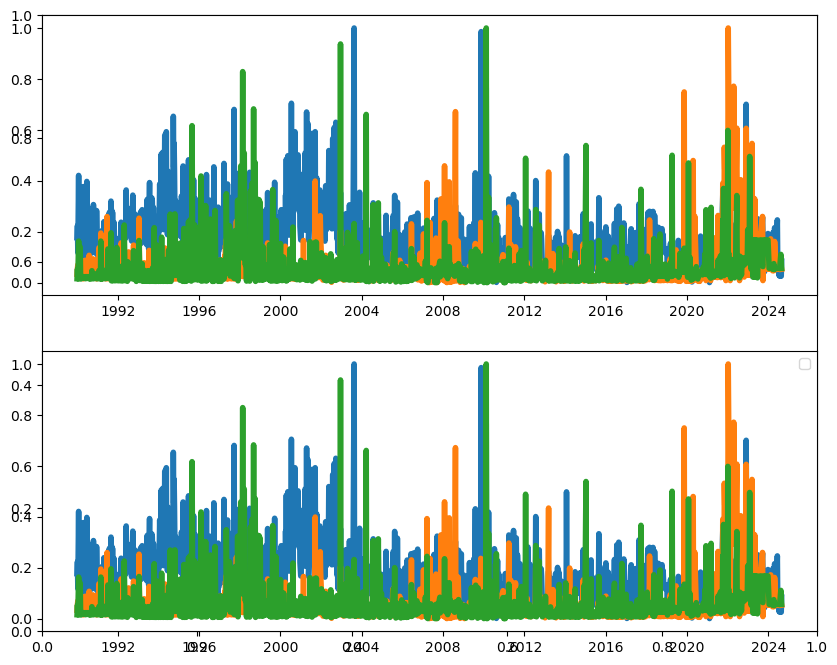

In [2741]:
plt.subplots(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(VAR_scaled,lw=4)
plt.subplot(2,1,2)
plt.plot(rolling_scaled,lw=4)
plt.legend()
plt.show()

In [2742]:
VAR_data.head(2)

ResultValue_K  ResultValue_A  ResultValue_N
date_adj                                               
1990-01-01       0.583333       0.033333       0.006500
1990-01-08       0.723684       0.056842       0.022826

In [2743]:
train_data_scaled

ResultValue_K  ResultValue_A  ResultValue_N
date_adj                                               
1990-01-01       0.175669       0.048281       0.015116
1990-01-08       0.222956       0.082332       0.053084
1990-01-15       0.116708       0.103805       0.015116
1990-01-22       0.268603       0.080871       0.088953
1990-01-29       0.420498       0.057937       0.162791
...                   ...            ...            ...
2014-03-10       0.013835       0.036211       0.006977
2014-03-17       0.085599       0.021051       0.006977
2014-03-24       0.160396       0.295481       0.086047
2014-03-31       0.061566       0.041763       0.006977
2014-04-07       0.025459       0.023175       0.038372

[1262 rows x 3 columns]

In [2744]:
test_data_scaled

ResultValue_K  ResultValue_A  ResultValue_N
date_adj                                               
2014-04-14       0.110307       0.098976       0.023256
2014-04-21       0.118999       0.065952       0.007442
2014-04-28       0.131084       0.089803       0.006977
2014-05-05       0.125974       0.063973       0.006977
2014-05-12       0.115248       0.008691       0.006977
...                   ...            ...            ...
2024-07-29       0.025129       0.095597       0.074074
2024-08-05       0.025977       0.112978       0.092334
2024-08-12       0.026826       0.130359       0.110594
2024-08-19       0.024472       0.091251       0.082060
2024-08-26       0.083578       0.078216       0.055814

[541 rows x 3 columns]

### Modelling

#### Augmented Dickey-Fuller Test for Univariate Stationarity

_**Aug. Dickey-Fuller Test:**_
>Hypothesis-<br>
>**H<sub>0</sub>**: Individual nitrogen-compound features do not exhibit statistically significant stationarity <br>
>**H<sub>1</sub>**: Individual nitrogen-compound features do exhibit stationarity over time

In [298]:
# Data has already been scaled with MinMax

# Splits scaled data
train_data, test_data = train_test_split(VAR_data, test_size=0.3, shuffle=False)

# Scale data
scaler=MinMaxScaler()
scaler.fit(train_data)
train_data_scaled = pd.DataFrame(scaler.transform(train_data), columns=train_data.columns, index=train_data.index)
test_data_scaled = pd.DataFrame(scaler.transform(test_data), columns=test_data.columns, index=test_data.index) 

In [311]:
ADF_df=pd.DataFrame(columns=['feature','t_t_subset,'])

# Running ADF test
for i in train_data.columns:
    print(f'Unscaled Data:{i}\n{check_stationarity(VAR_data[i])}\n')
        
    print(f'TRAIN Feature:{i}\n{check_stationarity(train_data_scaled[i])}\n')
    print(f'TEST Feature:{i}\n{check_stationarity(test_data_scaled[i])}\n\n###############')

ADF Statistic: -3.256494
p-value: 0.016939
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Unscaled Data:ResultValue_K
None

ADF Statistic: -3.506638
p-value: 0.007818
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
TRAIN Feature:ResultValue_K
None

ADF Statistic: -5.909698
p-value: 0.000000
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570
TEST Feature:ResultValue_K
None

###############
ADF Statistic: -4.450749
p-value: 0.000241
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Unscaled Data:ResultValue_A
None

ADF Statistic: -7.562957
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
TRAIN Feature:ResultValue_A
None

ADF Statistic: -2.380043
p-value: 0.147448
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570
TEST Feature:ResultValue_A
None

###############
ADF Statistic: -7.503430
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Unscaled Data:ResultValue_N
None

ADF Statistic: -7.326741
p-value: 0.000000
Critical V

When run with the original, full unscaled dataset, null hypothesis is rejected
- Scaled Train data demonstrates stationarity for all features.
- Test data instructs to reject the null hypothesis for Ammonia, both a high p-value and small ADF relative to critical values.<br>
ADF statistic < Critical Values(1%)<br><br>

Running VAR next.

#### Vector Auto Regression (VAR)

**Vector Autoregression**
>Hypothesis-<br>
>**H<sub>0</sub>**: Analysis, through coefficient comparison, predictive comparison and other insights, do not show any definitive differentiation of Kjeldahl values from Nitrates and Ammonia  <br>
>**H<sub>1</sub>**: VAR indicates that Kjeldahl values patterns over time vary significantly from that of _both_ ammonia and nitrates.

In [351]:
VAR_data

ResultValue_K  ResultValue_A  ResultValue_N
date_adj                                               
1990-01-01       0.583333       0.033333       0.006500
1990-01-08       0.723684       0.056842       0.022826
1990-01-15       0.408333       0.071667       0.006500
1990-01-22       0.859167       0.055833       0.038250
1990-01-29       1.310000       0.040000       0.070000
...                   ...            ...            ...
2024-07-29       0.136519       0.066000       0.031852
2024-08-05       0.139037       0.078000       0.039704
2024-08-12       0.141556       0.090000       0.047556
2024-08-19       0.134571       0.063000       0.035286
2024-08-26       0.310000       0.054000       0.024000

[1803 rows x 3 columns]

In [352]:
# VAR Model
model = VAR(train_data_scaled)
model2 = VAR(VAR_scaled)
# Fit Scaled VAR Lasso
#results = model.fit(method='ols', alpha=0.1, L1_wt=1, lags=12) 
#results = model.fit(maxlags=12, ic='aic', trend='ct', seas=52)  

C:\Users\Ajax\miniconda3\envs\bs\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Ajax\miniconda3\envs\bs\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [353]:
results4=model.fit(maxlags=4,ic='aic')
results8=model.fit(maxlags=8,ic='aic')
results12=model.fit(maxlags=12,ic='aic')
results16=model.fit(maxlags=16,ic='aic')
results26=model.fit(maxlags=26,ic='aic')
results_whole4=model2.fit(maxlags=4,ic='aic')
results_whole12=model2.fit(maxlags=12,ic='aic')
results_whole26=model2.fit(maxlags=26,ic='aic')

In [354]:
# Print model 2 (whole data set...just to see) summary

# Results for lag=4
print(results4.summary())
print('4############################################')
# Results for lag=8
print(results8.summary())
print('8############################################')
# Results for lag=12
print(results12.summary())
print('12############################################')

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 09, Dec, 2024
Time:                     23:30:35
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -15.2462
Nobs:                     1258.00    HQIC:                  -15.3456
Log likelihood:           4373.99    FPE:                2.03928e-07
AIC:                     -15.4055    Det(Omega_mle):     1.97734e-07
--------------------------------------------------------------------
Results for equation ResultValue_K
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                    0.066458         0.007944            8.365           0.000
L1.ResultValue_K         0.191265         0.027675            6.911           0.000
L1.ResultValue_A        -0.012605       

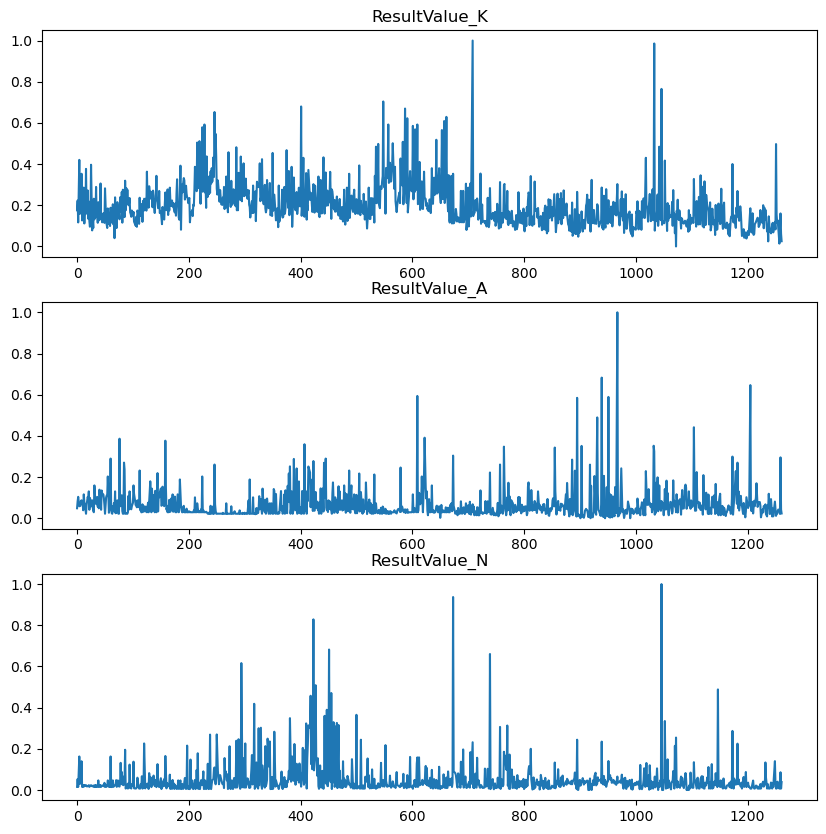

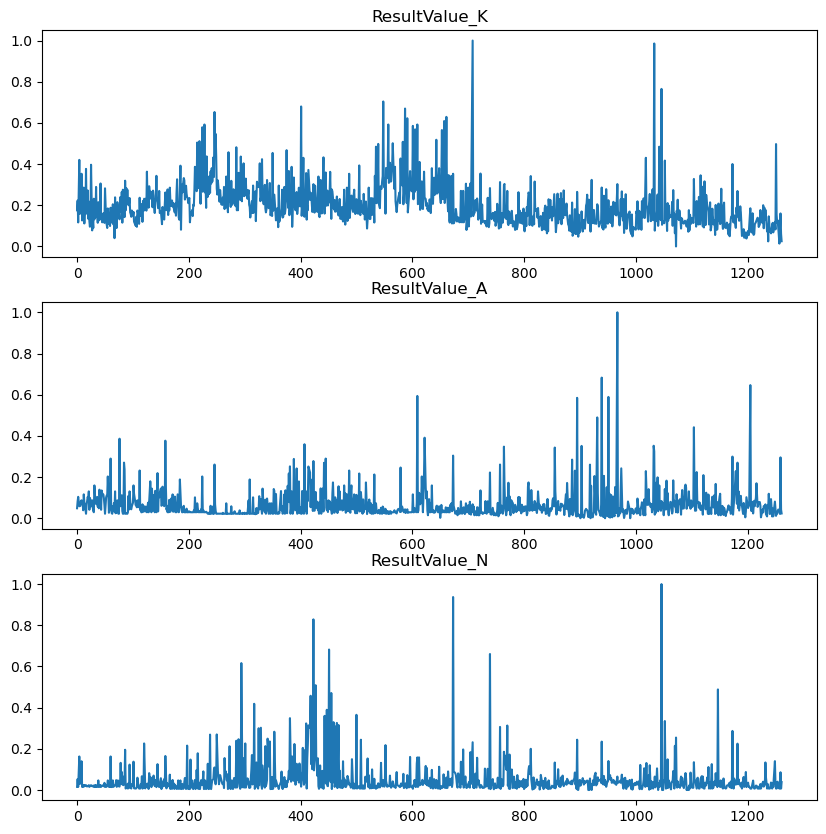

In [355]:
results4.plot()

In [356]:
lags = 12  
last_observations = train_data_scaled.values[-lags:]  
forecast = results12.forecast(y=last_observations, steps=len(test_data))

In [357]:
# Create a DataFrame with actual and forecasted values
forecast_df = pd.DataFrame({
    'Actual_K': test_data['ResultValue_K'],
    'Forecast_K': forecast[:, 0],  # Assuming Kjeldahl is the first variable
    'Actual_A': test_data['ResultValue_A'],
    'Forecast_A': forecast[:, 1],  # Assuming ammonia is the second variable
    'Actual_N': test_data['ResultValue_N'],
    'Forecast_N': forecast[:, 2]   # Assuming nitrates is the third variable
}, index=test_data.index)

# Calculate error metrics (example with MAE)
from sklearn.metrics import mean_absolute_error
mae_k = mean_absolute_error(forecast_df['Actual_K'], forecast_df['Forecast_K'])


In [358]:
forecast_df

Actual_K  Forecast_K  Actual_A  Forecast_A  Actual_N  Forecast_N
date_adj                                                                    
2014-04-14  0.389333    0.100525  0.068333    0.060467  0.010000    0.029688
2014-04-21  0.415133    0.125225  0.045533    0.085827  0.003200    0.041224
2014-04-28  0.451000    0.104318  0.062000    0.078892  0.003000    0.024224
2014-05-05  0.435833    0.076291  0.044167    0.063757  0.003000    0.036755
2014-05-12  0.404000    0.097401  0.006000    0.074987  0.003000    0.028698
...              ...         ...       ...         ...       ...         ...
2024-07-29  0.136519    0.193407  0.066000    0.067237  0.031852    0.051426
2024-08-05  0.139037    0.193407  0.078000    0.067237  0.039704    0.051426
2024-08-12  0.141556    0.193407  0.090000    0.067237  0.047556    0.051426
2024-08-19  0.134571    0.193407  0.063000    0.067237  0.035286    0.051426
2024-08-26  0.310000    0.193407  0.054000    0.067237  0.024000    0.051426

[541 rows x 6 columns]

In [359]:
### Results of the model without forecasting
results.plot()

NameError: name 'results' is not defined

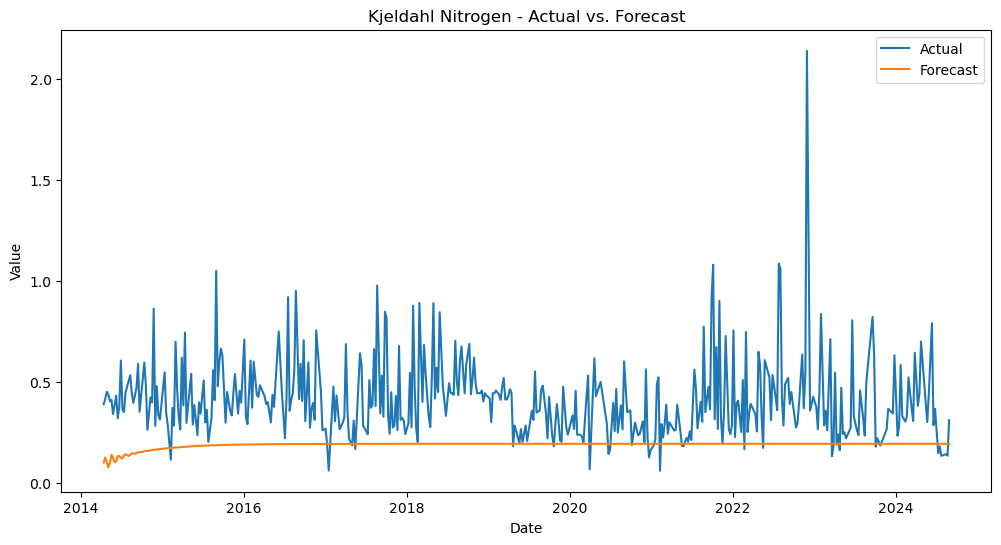

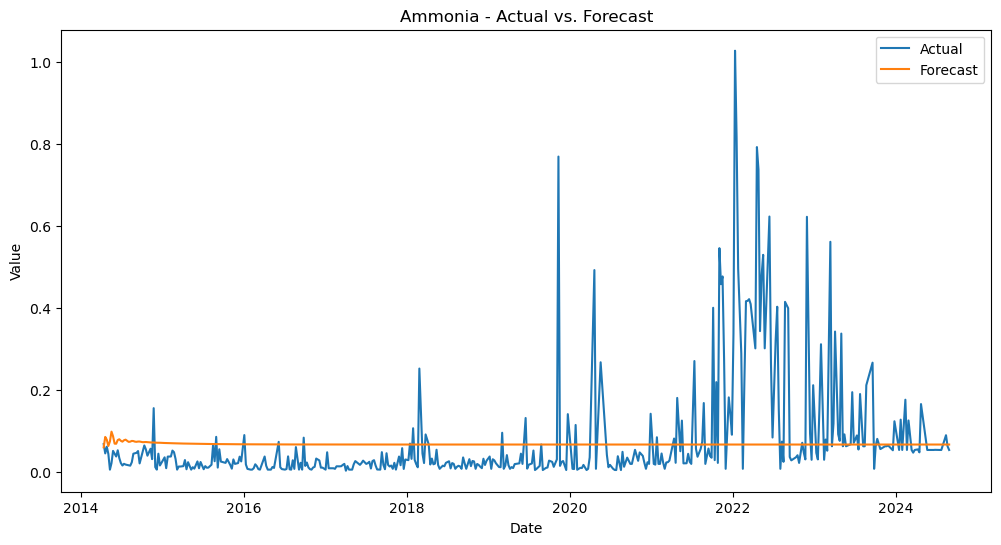

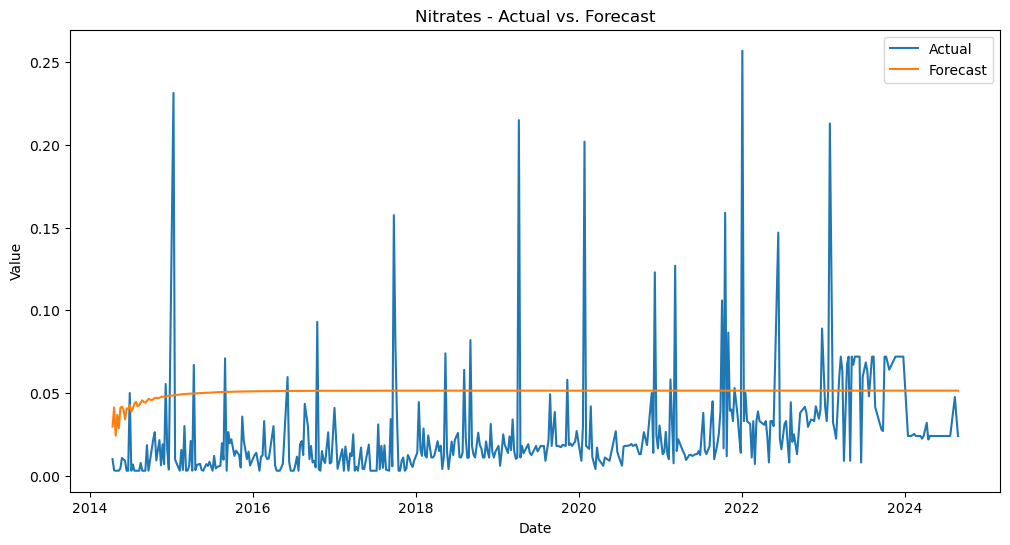

In [360]:
# Plot the actual vs. forecasted values for Kjeldahl
# The model shows barely any sign of seasonality in the first few forecasted periods before reaching a plateau, where it remains for the rest of the time series.

plt.figure(figsize=(12, 6))
plt.plot(forecast_df['Actual_K'], label='Actual')
plt.plot(forecast_df['Forecast_K'], label='Forecast')
plt.title('Kjeldahl Nitrogen - Actual vs. Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Repeat the plotting for ammonia and nitrates
plt.figure(figsize=(12, 6))
plt.plot(forecast_df['Actual_A'], label='Actual')
plt.plot(forecast_df['Forecast_A'], label='Forecast')
plt.title('Ammonia - Actual vs. Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(forecast_df['Actual_N'], label='Actual')
plt.plot(forecast_df['Forecast_N'], label='Forecast')
plt.title('Nitrates - Actual vs. Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'K_moving_average'

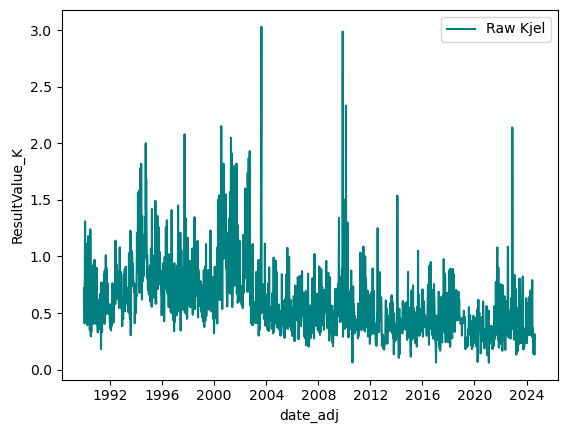

In [361]:
sns.lineplot(x=nmerge.index,y=nmerge.ResultValue_K,label='Raw Kjel',color='teal')
sns.lineplot(x=nmerge.index,y=nmerge.K_moving_average,label='Mov. Avg. Kjel',color='red')
plt.title('Kjeldahl 1990-2024, Raw and Moving Average')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'K_moving_average'

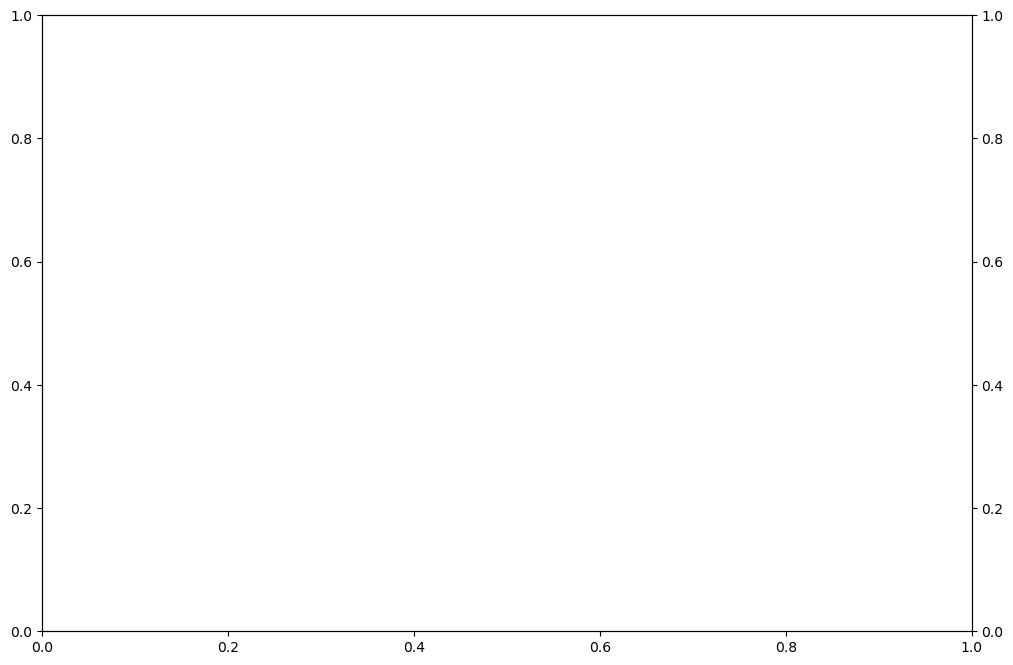

In [362]:
fig,ax = plt.subplots(figsize=(12,8))
#sns.lineplot(x=nmerge.index,y=nmerge.ResultValue_A,label='Raw Ammonia',color='black',lw=1,ax=ax)
ax1=ax.twinx()
#sns.lineplot(x=nmerge.index,y=nmerge.ResultValue_N,label='Raw Nitrates',color='orange',lw=1,ax=ax1)
sns.lineplot(x=nmerge.index,y=nmerge.K_moving_average,label='Mov. Avg. Kjel',color='teal',ax=ax)
sns.lineplot(x=nmerge.index,y=nmerge.A_moving_average,label='Mov. Avg. Ammonia',color='red',lw=4,ax=ax1)
sns.lineplot(x=nmerge.index,y=nmerge.N_moving_average,label='Mov. Avg. Nitrates',color='orange',lw=4,ax=ax1)


plt.title('Nitrates/Ammonia 1990-2024, Raw and Moving Average')
plt.show()

__** This test was ultimately disregarded. Exported CSVs were imported in the NEKTON notebook for further processing **__

### Nitrogen Loading Conclusions

Due to issues with formatting the datetime index, I haven't been able to get the frequency to set properly and, consequently, forecasting likely will be unhelpful. Results and conclusions drawn from the model should be understood with this in mind as it's difficult to assess the accuracy and performance of the model, particularly as a forecasting model. There are inferences that can be drawn about the relationships captured by the model between the 3 features.

The model had the most difficulty handling Nitrate values. P-values were less than 0.05 only in 4 lag iterations of the model - spiking beyond 0.45 in the next tier of 8 lags. The results do show, however, in the 4 and subsequent 8 lag iterations, nitrates has strong autocorrelation at the 4 week intervals (L1,L4,L8) which may provide insight into its sources. The 4 week lag period could be related to the transport time of nitrates through the watershed, which begins far inland before draining into the river systems and ultimately the bay. Monthly cyclicality of anthrogenic comunity services - such as agricultral practices, sewage treatment, would correlate  

There is some noted influence of ammonia on Kjeldahl values at lag 1 and lag 4, which could be explained by the conversion of organic nitrates into ammonia in the mineralisation process. The Kjelahl method also is measured as ammonia measured while processing water samples with a catalyst agent. Indirect influences of biological processes and existing levels of ammonia could explain this relationship; however, this is only one observation and not the primary driver of Kjeldahl concentrations or vice-versa.

Kjeldahl is more complex with of autocorrelation at lag 1,2,8,9, influences on ammonia at lag 1,2,4 and nitrogen  while also impacting ammonia at week 1,2,4, and nitro at possible 1 and 2; however, this does lend confidence to its use as a proxy as the organic form of nitrogen in the ecosystem. Decay and decomposition would impact ammonia and nitrate concentrations.

Low values of AIC and BIC are encouraging that the model performed reasonably well in explaining the existing data; however, no conclusions can be made about the model's predictive power without being rerun with corrected datasets and evaluation of its performance through error metrics.

I am confident though in proceeding with the base assumptions necessary to proceed its application in the development of the API (index).

Development 99.206KM COASTLINE NOT INCLUDING WATERWAYS

Here is the introduction of construction, real estate and development influences on the bay.
It is difficult to retrieve consisten data for land usage, development and coastal construction, due to privacy rights, hidden data and more.

Possible methods:
- Aggregation of construction data through issued permits and property records
- Land use categories
- Construction. Looking at permits, construction dates and even sales can inform development rates.

Initially, this study proposed looking at waterfront properties; the full property record dataset was used for 2 reasons. 1- Quantity of Data. Annual figures for construction would have been too low. More importantly, because of the size of the watershed (extending beyond county lines),  fertilizers, sewage treatment and other anth.gen. substances can be traced far inland. These compounds have been shown to be the most damaging to the Tampa Bay ecosystem. Input from increased activity, development and subsequent contamination of the water that feeds the bay should be evaluated by development at greater resolution. These have an equal weighted influence on anthropogenic pressures on the local marine ecosystem.

Data:
A CSV has consolidated all of the property records. These include construction dates, which are used as proxies for development rates.
The primary features of interest are
- Property Acreage
- Year Built
- Number of structures built
- Land type
- Total square footage of structure

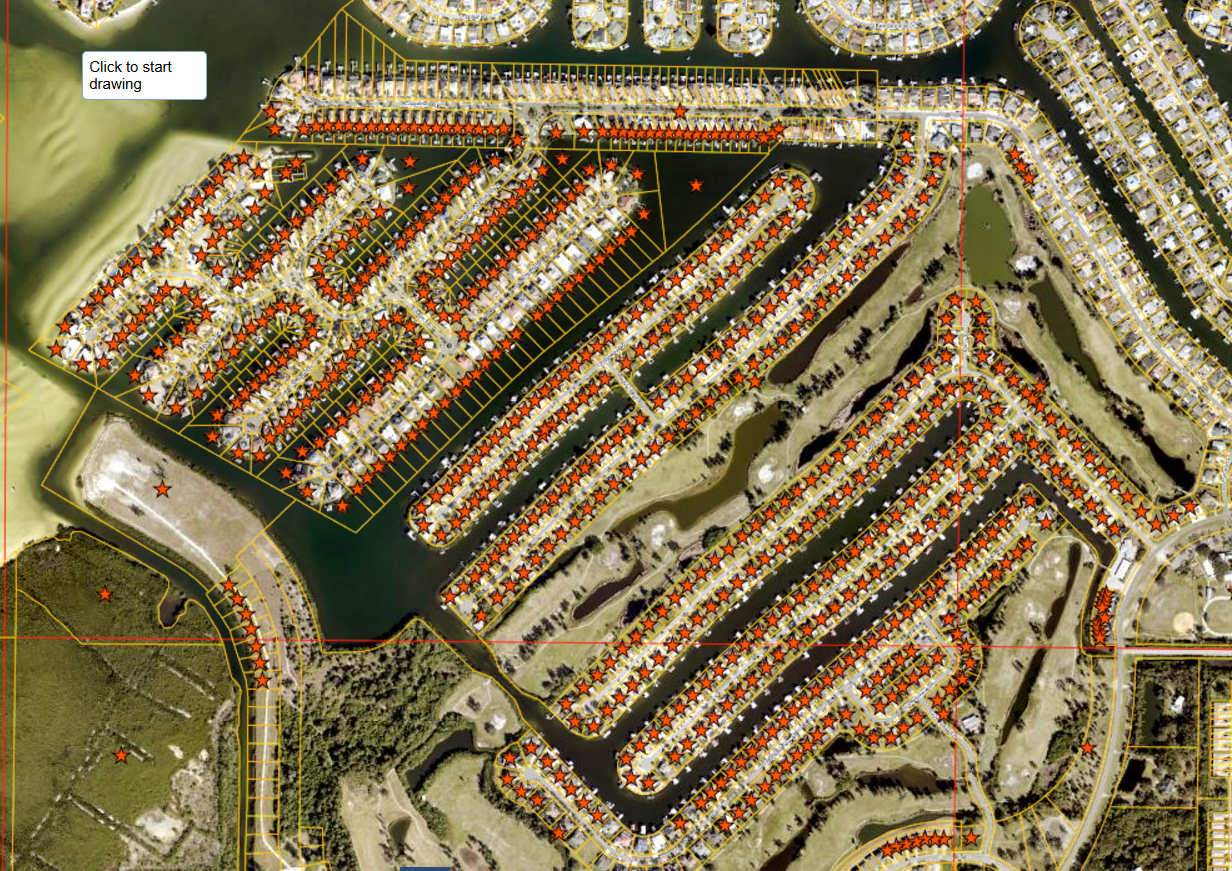

In [378]:
proprx

FOLIO TYPE     Edit_dt                            PIN DOR_C  \
0       1.000000e+04  NaN    4/8/2019  A-23-33-15-ZZZ-000000-00020.0  8800   
1       5.000000e+04  NaN    4/8/2019  A-23-33-15-ZZZ-000000-00040.0  8600   
2       8.000000e+04  NaN    4/9/2019  U-01-27-17-001-000000-00001.0  0000   
3       8.010000e+04  NaN    4/9/2019  U-01-27-17-001-000000-00001.1  0100   
4       9.000000e+04  NaN    4/9/2019  U-01-27-17-001-000000-00002.0  0100   
...              ...  ...         ...                            ...   ...   
526434  2.900000e+09  NaN  10/17/2022  U-32-27-19-1D6-000000-00000.2  8600   
526435  2.900000e+09  NaN    6/4/2024  U-29-27-22-ZZZ-000004-57310.1    29   
526436  2.900000e+09  NaN   4/18/2024  P-21-28-22-ZZZ-000006-01510.1    29   
526437  2.900000e+09  NaN   9/23/2024  U-02-28-19-HRV-000000-00007.1  8900   
526438  2.900000e+09  NaN   10/1/2024  A-27-29-18-ZZZ-000005-49920.1  8900   

                                 OWNER                     ADDR_1  \
0                        UNITED STATES      EGMONT KEY STATE PARK   
1                  HILLSBOROUGH COUNTY           REAL ESTATE DEPT   
2       PAULINE L SEVIGNY/ LIFE ESTATE             19931 ANGEL LN   
3         JEFFERY AND PATRICIA SEVIGNY             19859 ANGEL LN   
4          MARIETTA SHIVER LIFE ESTATE             19901 ANGEL LN   
...                                ...                        ...   
526434             HILLSBOROUGH COUNTY           REAL ESTATE DEPT   
526435                    PUBLIC LANDS                    UNKNOWN   
526436                    PUBLIC LANDS                    UNKNOWN   
526437                   CITY OF TAMPA      ATTN REAL ESTATE DEPT   
526438                   CITY OF TAMPA  ATTN REAL ESTATE DIVISION   

                         ADDR_2              CITY STATE  ... MUNI  SD1  SD2  \
0       4905 34TH ST S PMB 5000  SAINT PETERSBURG    FL  ...    A  NaN  NaN   
1                   PO BOX 1110             TAMPA    FL  ...    A  NaN  NaN   
2                           NaN            ODESSA    FL  ...    U  NaN  NaN   
3                           NaN            ODESSA    FL  ...    U  NaN  NaN   
4                           NaN            ODESSA    FL  ...    U  NaN  NaN   
...                         ...               ...   ...  ...  ...  ...  ...   
526434              PO BOX 1110             TAMPA    FL  ...    U  NaN  NaN   
526435                      NaN               NaN   NaN  ...    U  NaN  NaN   
526436                      NaN               NaN   NaN  ...    P  NaN  NaN   
526437         306 E JACKSON ST             TAMPA    FL  ...    U  NaN  NaN   
526438         306 E JACKSON ST             TAMPA    FL  ...    A  NaN  NaN   

        TIF  BASE    S_DATE   VI    S_AMT     ACREAGE      NBHC  
0       NaN     0       NaN  NaN      0.0  313.011000  227002.0  
1       NaN     0       NaN  NaN      0.0    6.147920  227002.0  
2       NaN     0       NaN  NaN      0.0    4.713410  211007.0  
3       NaN  2016  8/1/1987    I  50000.0    5.058780  211007.0  
4       NaN  1994       NaN  NaN      0.0    1.000590  211007.0  
...     ...   ...       ...  ...      ...         ...       ...  
526434  NaN     0       NaN  NaN      0.0    1.279250  215003.0  
526435  NaN     0       NaN  NaN      0.0    0.326255  219003.0  
526436  NaN     0       NaN  NaN      0.0    0.230953  221008.0  
526437  NaN     0       NaN  NaN      0.0   49.555400  216001.0  
526438  NaN     0       NaN  NaN      0.0   24.430500       0.0  

[526439 rows x 47 columns]

#### Processing df from initial dev of models (CODE OUTDATED)

In [379]:
AB_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Strap                    1000 non-null   object 
 1   Folio                    1000 non-null   int64  
 2   PIN                      1000 non-null   object 
 3   PropertyType             912 non-null    object 
 4   Owner1                   1000 non-null   object 
 5   Owner2                   515 non-null    object 
 6   MailingAddress1          1000 non-null   object 
 7   MailingAddress2          33 non-null     object 
 8   MailingCity              999 non-null    object 
 9   MailingState             1000 non-null   object 
 10  MailingZip               994 non-null    object 
 11  MailingCountry           6 non-null      object 
 12  SiteAddress              971 non-null    object 
 13  SiteCity                 997 non-null    object 
 14  SiteZip                  

In [380]:
dflist=[
AB_1,
AB_2,
AB_3,
AB_4,
AB_5,
AB_6,
AB_7,
GIB_8,
RIV_1]

In [381]:
dfprop=pd.DataFrame(data=AB_2)

In [382]:
# Combine all sections of property data
# dfprop = 'Dataframe: Property'
for x in dflist:
    print(x.shape)
    dfprop=pd.concat([dfprop,x],axis=0)

(500, 39)
(1000, 45)
(1000, 45)
(121, 45)
(1000, 45)
(660, 45)
(505, 45)
(1000, 45)
(1000, 45)


In [383]:
dfprop1=dfprop.copy()

In [384]:
dfprop.head(5)

Strap         Folio                            PIN  \
0  1931151SF000000009000U  5.155500e+08  U-15-31-19-1SF-000000-00900.0   
1  193116ZZZ000001745900U  5.166100e+08  U-16-31-19-ZZZ-000001-74590.0   
2  193120ZZZ000001751101U  2.900000e+09  U-20-31-19-ZZZ-000001-75110.1   
3  1931211SF000000560000U  5.156202e+08  U-21-31-19-1SF-000000-56000.0   
4  1931211SF000000562002U  5.156206e+08  U-21-31-19-1SF-000000-56200.2   

                     PropertyType                               Owner1 Owner2  \
0                             NaN               TAMPA ELECTRIC COMPANY    NaN   
1  MANUFACTURED HOME (AYB > 1976)                    TAMPA ELECTRIC CO    NaN   
2                             NaN                         PUBLIC LANDS    NaN   
3                          SCHOOL  SCHOOL BOARD OF HILLSBOROUGH COUNTY    NaN   
4                             NaN                  HILLSBOROUGH COUNTY    NaN   

                        MailingAddress1     MailingAddress2 MailingCity  \
0                            PO BOX 111                 NaN       TAMPA   
1  THE FLORIDA AQUARIUM ATTN THOM STORK  701 CHANNELSIDE DR       TAMPA   
2                               UNKNOWN                 NaN         NaN   
3        APOLLO BEACH ELEMENTARY SCHOOL  901 E KENNEDY BLVD       TAMPA   
4                      REAL ESTATE DEPT         PO BOX 1110       TAMPA   

  MailingState  ... BldgQual NumBath NumBed NumBldgs BldgCost  SqrFoot  \
0           FL  ...      NaN     NaN    NaN      NaN      NaN      NaN   
1           FL  ...      NaN     NaN    NaN      NaN      NaN      NaN   
2               ...      NaN     NaN    NaN      NaN      NaN      NaN   
3           FL  ...      NaN     NaN    NaN      NaN      NaN      NaN   
4           FL  ...      NaN     NaN    NaN      NaN      NaN      NaN   

  HtdSqrFoot CensusTract Lat Lng  
0        NaN         NaN NaN NaN  
1        NaN         NaN NaN NaN  
2        NaN         NaN NaN NaN  
3        NaN         NaN NaN NaN  
4        NaN         NaN NaN NaN  

[5 rows x 79 columns]

In [385]:
dfprop.shape

(7786, 79)

In [386]:
AB_1.head(1)

Strap            Owner HomesteadFlag  UseCode  \
0  U-17-31-19-1T4-000000-00011.0  PARSONS AARON A             Y        1   

                   UseDescription  TotAcres           PropAddress  \
0  0100 - Single Family Residence      0.28  6607 Dolphin Cove Dr   

       PropCity  PropZip            MailAddress  ... NumBed NumBldgs  \
0  Apollo Beach  33572.0  6607 DOLPHIN COVE DR   ...      5        1   

  YearBuilt  BldgCost  SqrFoot HtdSqrFoot  Neighborhood   CensusTract  \
0      1987  256523.0     3958       2882        227006  1.205701e+11   

         Lat        Lng  
0  27.780714 -82.417778  

[1 rows x 39 columns]

In [387]:
AB_2.head(1)

Strap      Folio                            PIN  \
0  1931151SF000000009000U  515550000  U-15-31-19-1SF-000000-00900.0   

  PropertyType                  Owner1 Owner2 MailingAddress1 MailingAddress2  \
0          NaN  TAMPA ELECTRIC COMPANY    NaN      PO BOX 111             NaN   

  MailingCity MailingState  ... TotalHeatedAreaSqFt TotalGrossAreaSqFt  \
0       TAMPA           FL  ...                   0                  0   

  JustValue AssessedValue  TaxableValue  LastSaleDate LastSalePrice  \
0   1506200       1458728       1458728    2016-10-25       6720000   

  VacantImproved    Qualified Unnamed: 44  
0         Vacant  Unqualified         NaN  

[1 rows x 45 columns]

In [388]:
AB_3.head(3)

Strap      Folio                            PIN  \
0  193109ZZZ000001736500U  514610000  U-09-31-19-ZZZ-000001-73650.0   
1  193114ZZZ000001743500U  515310000  U-14-31-19-ZZZ-000001-74350.0   
2  1931151SF000000003000U  515410000  U-15-31-19-1SF-000000-00300.0   

          PropertyType                Owner1 Owner2  \
0       PREFAB MTL BLD     TAMPA ELECTRIC CO    NaN   
1        WRHSE DISTRIB  FUTERNICK ASSOCIATES    NaN   
2  SERVICE/REPAIR SHOP     TAMPA ELECTRIC CO    NaN   

              MailingAddress1 MailingAddress2   MailingCity MailingState  ...  \
0   TECO ENERGY CORP TAX DEPT      PO BOX 111         TAMPA           FL  ...   
1  1430 S DIXIE HWY UNIT 1226             NaN  CORAL GABLES           FL  ...   
2   TECO ENERGY CORP TAX DEPT      PO BOX 111         TAMPA           FL  ...   

  TotalHeatedAreaSqFt TotalGrossAreaSqFt JustValue AssessedValue TaxableValue  \
0              593167             624374  54505407      54505407     54505407   
1               86761              91823   7578800       7578800      7578800   
2                4071               4071   5977944       5977944      5977944   

   LastSaleDate LastSalePrice VacantImproved    Qualified Unnamed: 44  
0    1981-12-01           100            NaN  Unqualified         NaN  
1    2017-08-25       2662500         Vacant  Unqualified         NaN  
2    1982-02-01        430500       Improved  Unqualified         NaN  

[3 rows x 45 columns]

In [389]:
dfprop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7786 entries, 0 to 999
Data columns (total 79 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Strap                    7786 non-null   object 
 1   Folio                    7286 non-null   float64
 2   PIN                      7286 non-null   object 
 3   PropertyType             6229 non-null   object 
 4   Owner1                   7286 non-null   object 
 5   Owner2                   3635 non-null   object 
 6   MailingAddress1          7286 non-null   object 
 7   MailingAddress2          331 non-null    object 
 8   MailingCity              7280 non-null   object 
 9   MailingState             7286 non-null   object 
 10  MailingZip               7248 non-null   object 
 11  MailingCountry           41 non-null     object 
 12  SiteAddress              6990 non-null   object 
 13  SiteCity                 7261 non-null   object 
 14  SiteZip                  7258 

In [390]:
"""
Columns for Selection Pressure analysis

3,
8,
14,
15,
25,
26,
30,
36,
40,
42

"""

'\nColumns for Selection Pressure analysis\n\n3,\n8,\n14,\n15,\n25,\n26,\n30,\n36,\n40,\n42\n\n'

In [391]:
#Selecting columns of interest
dfprop.drop_duplicates(inplace=True)

In [392]:
dfprop=dfprop[dfprop.columns[[0,3,13,14,15,25,27,30,36,40,42]]]

In [393]:
RIV_1=RIV_1[RIV_1.columns[[0,3,13,14,15,25,27,30,36,40,42]]]

In [394]:
RIV_1.shape

(1000, 11)

In [395]:
dfprop.shape

(6358, 11)

In [396]:
dfprop1

Strap         Folio                            PIN  \
0    1931151SF000000009000U  5.155500e+08  U-15-31-19-1SF-000000-00900.0   
1    193116ZZZ000001745900U  5.166100e+08  U-16-31-19-ZZZ-000001-74590.0   
2    193120ZZZ000001751101U  2.900000e+09  U-20-31-19-ZZZ-000001-75110.1   
3    1931211SF000000560000U  5.156202e+08  U-21-31-19-1SF-000000-56000.0   
4    1931211SF000000562002U  5.156206e+08  U-21-31-19-1SF-000000-56200.2   
..                      ...           ...                            ...   
995  1930231R1000000000088U  4.946100e+08  U-23-30-19-1R1-000000-00008.8   
996  1930231R100000000008AU  4.946200e+08  U-23-30-19-1R1-000000-00008.A   
997  193023ZZZ000001698600U  4.931100e+08  U-23-30-19-ZZZ-000001-69860.0   
998  193023ZZZ000001698800U  4.931400e+08  U-23-30-19-ZZZ-000001-69880.0   
999  193031ZZZ000000000200U  4.928861e+08  U-31-30-19-ZZZ-000000-00020.0   

                       PropertyType                               Owner1  \
0                               NaN               TAMPA ELECTRIC COMPANY   
1    MANUFACTURED HOME (AYB > 1976)                    TAMPA ELECTRIC CO   
2                               NaN                         PUBLIC LANDS   
3                            SCHOOL  SCHOOL BOARD OF HILLSBOROUGH COUNTY   
4                               NaN                  HILLSBOROUGH COUNTY   
..                              ...                                  ...   
995  MANUFACTURED HOME (AYB > 1976)              RIVERA ANTONIA GONZALEZ   
996  MANUFACTURED HOME (AYB > 1976)                     GARCIA TIMOTHY A   
997                             NaN                MOSAIC FERTILIZER LLC   
998                             NaN               DEPT OF TRANSPORTATION   
999                             NaN                 TAMPA PORT AUTHORITY   

                          Owner2                       MailingAddress1  \
0                            NaN                            PO BOX 111   
1                            NaN  THE FLORIDA AQUARIUM ATTN THOM STORK   
2                            NaN                               UNKNOWN   
3                            NaN        APOLLO BEACH ELEMENTARY SCHOOL   
4                            NaN                      REAL ESTATE DEPT   
..                           ...                                   ...   
995  LANDAVERDE ROBERTO ESPINOSA                           PO BOX 6201   
996                          NaN                     6705 RIVERVIEW DR   
997                          NaN           101 E KENNEDY BLVD STE 2500   
998                          NaN                     11201 MCKINLEY DR   
999                          NaN           1101 CHANNELSIDE DR STE 400   

        MailingAddress2      MailingCity MailingState  ... BldgQual NumBath  \
0                   NaN            TAMPA           FL  ...      NaN     NaN   
1    701 CHANNELSIDE DR            TAMPA           FL  ...      NaN     NaN   
2                   NaN              NaN               ...      NaN     NaN   
3    901 E KENNEDY BLVD            TAMPA           FL  ...      NaN     NaN   
4           PO BOX 1110            TAMPA           FL  ...      NaN     NaN   
..                  ...              ...          ...  ...      ...     ...   
995                 NaN  SUN CITY CENTER           FL  ...      NaN     NaN   
996                 NaN        RIVERVIEW           FL  ...      NaN     NaN   
997                 NaN            TAMPA           FL  ...      NaN     NaN   
998                 NaN            TAMPA           FL  ...      NaN     NaN   
999                 NaN            TAMPA           FL  ...      NaN     NaN   

    NumBed NumBldgs BldgCost  SqrFoot HtdSqrFoot CensusTract Lat Lng  
0      NaN      NaN      NaN      NaN        NaN         NaN NaN NaN  
1      NaN      NaN      NaN      NaN        NaN         NaN NaN NaN  
2      NaN      NaN      NaN      NaN        NaN         NaN NaN NaN  
3      NaN      NaN      NaN      NaN        NaN         NaN NaN NaN  
4  

In [397]:
# Join remaining df csv for a consolidated table
dfprop=pd.concat([dfprop,RIV_1])

In [398]:
#null check
dfprop.isna().sum()

Strap                    0
PropertyType          1676
SiteCity               522
SiteZip                523
Acreage                500
TotalNumBuildings      500
TotalStories           500
YearBuilt                0
TotalGrossAreaSqFt     500
LastSaleDate           164
VacantImproved         818
dtype: int64

In [399]:
# To be consildated into higher aggregate categories: Residential, Commercial, Industrial, Other
dfprop.PropertyType.value_counts()

PropertyType
SINGLE FAMILY                     3514
MANUFACTURED HOME (AYB > 1976)     722
TOWNHOUSE                          604
MOBILE HOME (AYB < 1977)           258
CONDOMINIUM                        149
OFFICE <3 STORY                     65
PREFAB MTL BLD                      54
WRHSE - STORAGE                     42
DUPLEX/TRIPLEX/QUADPLX/ETC          39
COMM/CONDO 2                        30
AUTO SERVICE/REPAIR GARAGE          24
NOT CALCULATING                     20
CLUBHOUSE                           18
RETAIL STRIP CENTER                 18
WRHSE DISTRIB                       13
CONVENIENCE STORE                   12
STORE RETAIL                        12
MODULAR HOME                        11
APARTMENT <4 STORY                   9
MFG LIGHT                            9
CHURCH                               8
SERVICE/REPAIR SHOP                  7
RESTAURANT                           6
MEDICAL OFFICE                       5
SCHOOL                               4
REST FAST FO

In [400]:
# Slight cleaning of the data
# Some of the grids overlapped so these rows must be accounted for
dfprop.duplicated().value_counts()

False    6358
True     1000
Name: count, dtype: int64

In [401]:
dfprop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7358 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Strap               7358 non-null   object 
 1   PropertyType        5682 non-null   object 
 2   SiteCity            6836 non-null   object 
 3   SiteZip             6835 non-null   object 
 4   Acreage             6858 non-null   float64
 5   TotalNumBuildings   6858 non-null   float64
 6   TotalStories        6858 non-null   float64
 7   YearBuilt           7358 non-null   int64  
 8   TotalGrossAreaSqFt  6858 non-null   float64
 9   LastSaleDate        7194 non-null   object 
 10  VacantImproved      6540 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 689.8+ KB


In [402]:
dfprop.isna().sum()

Strap                    0
PropertyType          1676
SiteCity               522
SiteZip                523
Acreage                500
TotalNumBuildings      500
TotalStories           500
YearBuilt                0
TotalGrossAreaSqFt     500
LastSaleDate           164
VacantImproved         818
dtype: int64

In [403]:
dfprop.Acreage

0       41.89
1       19.51
2      110.66
3       14.82
4        0.17
        ...  
995      0.21
996      0.59
997      5.28
998      0.84
999    427.38
Name: Acreage, Length: 7358, dtype: float64

In [404]:
dfprop.PropertyType.value_counts()

PropertyType
SINGLE FAMILY                     3514
MANUFACTURED HOME (AYB > 1976)     722
TOWNHOUSE                          604
MOBILE HOME (AYB < 1977)           258
CONDOMINIUM                        149
OFFICE <3 STORY                     65
PREFAB MTL BLD                      54
WRHSE - STORAGE                     42
DUPLEX/TRIPLEX/QUADPLX/ETC          39
COMM/CONDO 2                        30
AUTO SERVICE/REPAIR GARAGE          24
NOT CALCULATING                     20
CLUBHOUSE                           18
RETAIL STRIP CENTER                 18
WRHSE DISTRIB                       13
CONVENIENCE STORE                   12
STORE RETAIL                        12
MODULAR HOME                        11
APARTMENT <4 STORY                   9
MFG LIGHT                            9
CHURCH                               8
SERVICE/REPAIR SHOP                  7
RESTAURANT                           6
MEDICAL OFFICE                       5
SCHOOL                               4
REST FAST FO

#### Data Cleaning

In [405]:
dfprop.PropertyType.isna().sum()

1676

In [406]:
dfprop.PropertyType.fillna('undefined',inplace=True)

C:\Users\Ajax\AppData\Local\Temp\ipykernel_84184\2890697567.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfprop.PropertyType.fillna('undefined',inplace=True)


In [407]:
dfprop.duplicated().sum()

1000

In [408]:
# Get rid of redundant data rows|
dfprop.drop_duplicates(inplace=True)

In [409]:
dfprop.isna().sum()

Strap                   0
PropertyType            0
SiteCity              517
SiteZip               518
Acreage               500
TotalNumBuildings     500
TotalStories          500
YearBuilt               0
TotalGrossAreaSqFt    500
LastSaleDate          101
VacantImproved        710
dtype: int64

In [410]:
dfprop.duplicated().value_counts()

False    6358
Name: count, dtype: int64

In [411]:
dfprop[dfprop.SiteCity.isna()==True]

Strap    PropertyType SiteCity SiteZip  Acreage  \
994         193122C6N000000000010U  REST FAST FOOD      NaN     NaN     0.84   
995         193122C6N000000000020U  MEDICAL OFFICE      NaN     NaN     0.70   
996         193122C6N000000000030U  MEDICAL OFFICE      NaN     NaN     0.69   
0    U-17-31-19-1T4-000000-00011.0       undefined      NaN     NaN      NaN   
1    U-18-32-19-ZZZ-000001-79190.0       undefined      NaN     NaN      NaN   
..                             ...             ...      ...     ...      ...   
404         192922ZZZ000001494603U       undefined      NaN     NaN     0.20   
405         192922ZZZ000001494605U       undefined      NaN     NaN     0.15   
406         192922ZZZ000001494607U       undefined      NaN     NaN     0.17   
583         192927663000001589701U       undefined      NaN     NaN     2.71   
808         1929331Q2000005000025U       undefined      NaN     NaN     0.51   

     TotalNumBuildings  TotalStories  YearBuilt  TotalGrossAreaSqFt  \
994                1.0           1.0       2021              2814.0   
995                1.0           1.0       2021              4830.0   
996                1.0           1.0       2021              4620.0   
0                  NaN           NaN       1987                 NaN   
1                  NaN           NaN       1966                 NaN   
..                 ...           ...        ...                 ...   
404                0.0           0.0          0                 0.0   
405                0.0           0.0          0                 0.0   
406                0.0           0.0          0                 0.0   
583                0.0           0.0          0                 0.0   
808                0.0           0.0          0                 0.0   

               LastSaleDate VacantImproved  
994              2022-03-15       Improved  
995              2021-12-16       Improved  
996              2020-10-02         Vacant  
0    10/10/2018 12:00:00 AM            NaN  
1      4/2/2021 12:00:00 AM            NaN  
..                      ...            ...  
404              2023-05-23         Vacant  
405              2023-05-23         Vacant  
406              2023-05-23         Vacant  
583              2022-03-31         Vacant  
808              1982-07-02         Vacant  

[517 rows x 11 columns]

In [412]:
dfprop[dfprop.VacantImproved.isna() & dfprop.YearBuilt>0]

Strap                    PropertyType  \
35          1931211TM000001000220U                   SINGLE FAMILY   
85          1931211TM000006000090U                   SINGLE FAMILY   
113         1931211TM000017000280U                   SINGLE FAMILY   
115         1931211TM000017000300U                   SINGLE FAMILY   
0    U-17-31-19-1T4-000000-00011.0                       undefined   
..                             ...                             ...   
895         193003663000001671901U                   WRHSE DISTRIB   
910         193004ZZZ000001672102U                  PREFAB MTL BLD   
915         193004ZZZ000001672300U  MANUFACTURED HOME (AYB > 1976)   
932         193005ZZZ000005818120U                  PREFAB MTL BLD   
951         193010ZZZ000001679700U                  PREFAB MTL BLD   

         SiteCity  SiteZip  Acreage  TotalNumBuildings  TotalStories  \
35   APOLLO BEACH  33572.0     0.24                1.0           1.0   
85   APOLLO BEACH  33572.0     0.23                1.0           1.0   
113  APOLLO BEACH  33572.0     0.18                1.0           1.0   
115  APOLLO BEACH  33572.0     0.18                1.0           1.0   
0             NaN      NaN      NaN                NaN           NaN   
..            ...      ...      ...                ...           ...   
895         TAMPA    33619    99.01                1.0           1.0   
910         TAMPA    33619    12.12                3.0           3.0   
915         TAMPA    33619     3.75                1.0           1.0   
932         TAMPA    33619    15.00                3.0           3.0   
951         TAMPA    33619     2.11                1.0           1.0   

     YearBuilt  TotalGrossAreaSqFt            LastSaleDate VacantImproved  
35        1977              2149.0              2002-03-22            NaN  
85        1959              2194.0              2001-12-18            NaN  
113       1971              1400.0              2001-01-10            NaN  
115       1971              1868.0              2002-04-16            NaN  
0         1987                 NaN  10/10/2018 12:00:00 AM            NaN  
..         ...                 ...                     ...            ...  
895       2009            591898.0                     NaN            NaN  
910       2007              4582.0                     NaN            NaN  
915       1987              1348.0                     NaN            NaN  
932       1993              2613.0                     NaN            NaN  
951       1965              2400.0              1975-01-01            NaN  

[248 rows x 11 columns]

In [413]:
# not all columns are relevant and their NaN, null or 0 status is not important
dfprop.isna().sum()

Strap                   0
PropertyType            0
SiteCity              517
SiteZip               518
Acreage               500
TotalNumBuildings     500
TotalStories          500
YearBuilt               0
TotalGrossAreaSqFt    500
LastSaleDate          101
VacantImproved        710
dtype: int64

In [414]:
# Improved plots that have been misclassified
dfprop[dfprop.VacantImproved.isna() & dfprop.YearBuilt>0].VacantImproved.fillna('Improved',inplace=True)

C:\Users\Ajax\AppData\Local\Temp\ipykernel_84184\1555862745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfprop[dfprop.VacantImproved.isna() & dfprop.YearBuilt>0].VacantImproved.fillna('Improved',inplace=True)


In [415]:
# Looking for common traits - perhaps it speaks to why these properties were misclassified and and relevance
dfprop[dfprop.YearBuilt==0].PropertyType.unique()

array(['undefined', 'CONDOMINIUM', 'TOWNHOUSE'], dtype=object)

In [416]:
dfprop

Strap                    PropertyType      SiteCity  \
0    1931151SF000000009000U                       undefined  APOLLO BEACH   
1    193116ZZZ000001745900U  MANUFACTURED HOME (AYB > 1976)  APOLLO BEACH   
2    193120ZZZ000001751101U                       undefined  APOLLO BEACH   
3    1931211SF000000560000U                          SCHOOL  APOLLO BEACH   
4    1931211SF000000562002U                       undefined  APOLLO BEACH   
..                      ...                             ...           ...   
991  1930231R100000000007IU        MOBILE HOME (AYB < 1977)     RIVERVIEW   
992  1930231R100000000007JU  MANUFACTURED HOME (AYB > 1976)     RIVERVIEW   
993  1930231R1000000000081U                   SINGLE FAMILY     RIVERVIEW   
994  1930231R1000000000086U                   SINGLE FAMILY     RIVERVIEW   
999  193031ZZZ000000000200U                       undefined     GIBSONTON   

     SiteZip  Acreage  TotalNumBuildings  TotalStories  YearBuilt  \
0    33572.0    41.89                0.0           0.0          0   
1    33572.0    19.51                5.0           6.0       2014   
2    33572.0   110.66                0.0           0.0          0   
3    33572.0    14.82                1.0           1.0       1981   
4    33572.0     0.17                0.0           0.0          0   
..       ...      ...                ...           ...        ...   
991    33578     0.14                1.0           1.0       1971   
992    33578     0.14                1.0           1.0       1983   
993    33578     0.36                2.0           2.0       1986   
994    33578     0.42                1.0           1.0       2021   
999    33534   427.38                0.0           0.0          0   

     TotalGrossAreaSqFt LastSaleDate VacantImproved  
0                   0.0   2016-10-25         Vacant  
1               59269.0   1973-01-01            NaN  
2                   0.0          NaN            NaN  
3               93256.0   1980-07-01         Vacant  
4                   0.0   2013-02-18         Vacant  
..                  ...          ...            ...  
991              1200.0   2022-07-21       Improved  
992              1442.0   2018-04-11       Improved  
993              4747.0   1994-10-01       Improved  
994              1310.0   1977-09-01       Improved  
999                 0.0          NaN            NaN  

[6358 rows x 11 columns]

In [417]:
dfprop.sort_values(by='YearBuilt').YearBuilt.value_counts().sort_index()

YearBuilt
0       1088
1900       1
1902       1
1911       1
1919       1
        ... 
2020      41
2021      51
2022      85
2023     115
2024      93
Name: count, Length: 104, dtype: int64

#### Full Property Dataset
Data Description file also found in repo

In [418]:
# df check
proprx.head(2)

FOLIO TYPE   Edit_dt                            PIN DOR_C  \
0  10000.0  NaN  4/8/2019  A-23-33-15-ZZZ-000000-00020.0  8800   
1  50000.0  NaN  4/8/2019  A-23-33-15-ZZZ-000000-00040.0  8600   

                 OWNER                 ADDR_1                   ADDR_2  \
0        UNITED STATES  EGMONT KEY STATE PARK  4905 34TH ST S PMB 5000   
1  HILLSBOROUGH COUNTY       REAL ESTATE DEPT              PO BOX 1110   

               CITY STATE  ... MUNI  SD1  SD2  TIF BASE S_DATE   VI S_AMT  \
0  SAINT PETERSBURG    FL  ...    A  NaN  NaN  NaN    0    NaN  NaN   0.0   
1             TAMPA    FL  ...    A  NaN  NaN  NaN    0    NaN  NaN   0.0   

     ACREAGE      NBHC  
0  313.01100  227002.0  
1    6.14792  227002.0  

[2 rows x 47 columns]

In [419]:
#col check
# ACT ='Actual Year Built'
proprx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526439 entries, 0 to 526438
Data columns (total 47 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   FOLIO      526438 non-null  float64
 1   TYPE       1 non-null       object 
 2   Edit_dt    526439 non-null  object 
 3   PIN        523147 non-null  object 
 4   DOR_C      526400 non-null  object 
 5   OWNER      526386 non-null  object 
 6   ADDR_1     523110 non-null  object 
 7   ADDR_2     22297 non-null   object 
 8   CITY       522814 non-null  object 
 9   STATE      521229 non-null  object 
 10  ZIP        521247 non-null  object 
 11  COUNTRY    1595 non-null    object 
 12  SUB        523147 non-null  object 
 13  SITE_ADDR  523147 non-null  object 
 14  SITE_CITY  521466 non-null  object 
 15  SITE_ZIP   521150 non-null  object 
 16  LEGAL1     523147 non-null  object 
 17  LEGAL2     519503 non-null  object 
 18  LEGAL3     103037 non-null  object 
 19  LEGAL4     51478 non-nu

In [420]:
# No properties missing built date
proprx.isna().sum()

FOLIO             1
TYPE         526438
Edit_dt           0
PIN            3292
DOR_C            39
OWNER            53
ADDR_1         3329
ADDR_2       504142
CITY           3625
STATE          5210
ZIP            5192
COUNTRY      524844
SUB            3292
SITE_ADDR      3292
SITE_CITY      4973
SITE_ZIP       5289
LEGAL1         3292
LEGAL2         6936
LEGAL3       423402
LEGAL4       474961
DBA          490471
STRAP            39
tBEDS             0
tBATHS            0
tSTORIES          0
tUNITS            0
tBLDGS            0
TAXDIST          39
JUST              0
LAND              0
BLDG              0
EXF               0
ACT               0
EFF               0
HEAT_AR           0
ASD_VAL           0
TAX_VAL           0
MUNI             39
SD1          398039
SD2          523387
TIF          480595
BASE              0
S_DATE        82607
VI            96411
S_AMT             0
ACREAGE           0
NBHC              0
dtype: int64

In [421]:
#lookat act values
#there are 0 values
proprx.ACT.head(20)

0        0
1        0
2        0
3     1996
4     1973
5     1976
6        0
7     1926
8     2001
9     1987
10    1972
11    1983
12       0
13    1978
14       0
15    2012
16    1994
17    2003
18    2003
19    1964
Name: ACT, dtype: int64

In [422]:
print(proprx.ACT.value_counts())
print('\nSHAPE: ',proprx.ACT.shape)
proprx[proprx.ACT==0].shape

ACT
0       48704
2005    13031
2006    12874
2001    12351
2004    11001
        ...  
1860        1
1842        1
1882        1
1875        1
1885        1
Name: count, Length: 145, dtype: int64

SHAPE:  (526439,)


(48704, 47)

About 10% loss of records, which is acceptable given the number of records.

In [423]:
proprx

FOLIO TYPE     Edit_dt                            PIN DOR_C  \
0       1.000000e+04  NaN    4/8/2019  A-23-33-15-ZZZ-000000-00020.0  8800   
1       5.000000e+04  NaN    4/8/2019  A-23-33-15-ZZZ-000000-00040.0  8600   
2       8.000000e+04  NaN    4/9/2019  U-01-27-17-001-000000-00001.0  0000   
3       8.010000e+04  NaN    4/9/2019  U-01-27-17-001-000000-00001.1  0100   
4       9.000000e+04  NaN    4/9/2019  U-01-27-17-001-000000-00002.0  0100   
...              ...  ...         ...                            ...   ...   
526434  2.900000e+09  NaN  10/17/2022  U-32-27-19-1D6-000000-00000.2  8600   
526435  2.900000e+09  NaN    6/4/2024  U-29-27-22-ZZZ-000004-57310.1    29   
526436  2.900000e+09  NaN   4/18/2024  P-21-28-22-ZZZ-000006-01510.1    29   
526437  2.900000e+09  NaN   9/23/2024  U-02-28-19-HRV-000000-00007.1  8900   
526438  2.900000e+09  NaN   10/1/2024  A-27-29-18-ZZZ-000005-49920.1  8900   

                                 OWNER                     ADDR_1  \
0                        UNITED STATES      EGMONT KEY STATE PARK   
1                  HILLSBOROUGH COUNTY           REAL ESTATE DEPT   
2       PAULINE L SEVIGNY/ LIFE ESTATE             19931 ANGEL LN   
3         JEFFERY AND PATRICIA SEVIGNY             19859 ANGEL LN   
4          MARIETTA SHIVER LIFE ESTATE             19901 ANGEL LN   
...                                ...                        ...   
526434             HILLSBOROUGH COUNTY           REAL ESTATE DEPT   
526435                    PUBLIC LANDS                    UNKNOWN   
526436                    PUBLIC LANDS                    UNKNOWN   
526437                   CITY OF TAMPA      ATTN REAL ESTATE DEPT   
526438                   CITY OF TAMPA  ATTN REAL ESTATE DIVISION   

                         ADDR_2              CITY STATE  ... MUNI  SD1  SD2  \
0       4905 34TH ST S PMB 5000  SAINT PETERSBURG    FL  ...    A  NaN  NaN   
1                   PO BOX 1110             TAMPA    FL  ...    A  NaN  NaN   
2                           NaN            ODESSA    FL  ...    U  NaN  NaN   
3                           NaN            ODESSA    FL  ...    U  NaN  NaN   
4                           NaN            ODESSA    FL  ...    U  NaN  NaN   
...                         ...               ...   ...  ...  ...  ...  ...   
526434              PO BOX 1110             TAMPA    FL  ...    U  NaN  NaN   
526435                      NaN               NaN   NaN  ...    U  NaN  NaN   
526436                      NaN               NaN   NaN  ...    P  NaN  NaN   
526437         306 E JACKSON ST             TAMPA    FL  ...    U  NaN  NaN   
526438         306 E JACKSON ST             TAMPA    FL  ...    A  NaN  NaN   

        TIF  BASE    S_DATE   VI    S_AMT     ACREAGE      NBHC  
0       NaN     0       NaN  NaN      0.0  313.011000  227002.0  
1       NaN     0       NaN  NaN      0.0    6.147920  227002.0  
2       NaN     0       NaN  NaN      0.0    4.713410  211007.0  
3       NaN  2016  8/1/1987    I  50000.0    5.058780  211007.0  
4       NaN  1994       NaN  NaN      0.0    1.000590  211007.0  
...     ...   ...       ...  ...      ...         ...       ...  
526434  NaN     0       NaN  NaN      0.0    1.279250  215003.0  
526435  NaN     0       NaN  NaN      0.0    0.326255  219003.0  
526436  NaN     0       NaN  NaN      0.0    0.230953  221008.0  
526437  NaN     0       NaN  NaN      0.0   49.555400  216001.0  
526438  NaN     0       NaN  NaN      0.0   24.430500       0.0  

[526439 rows x 47 columns]

In [424]:
#isolate features
proprx2=proprx.groupby(['SITE_CITY','ACT','ACREAGE','tUNITS','tBLDGS','HEAT_AR'])['ACT'].agg({'mean','min','max'}).reset_index()

In [425]:
# Agg House construction by year
# Year is the most granular offered by dataset
annbuilt=proprx2.groupby('ACT').ACT.sum()
annbuilt=annbuilt.to_frame().reset_index(names=['yrbuilt'])

In [426]:
# isolate to 2024
annbuilt=annbuilt[annbuilt.yrbuilt.between(1989,2024)]

In [427]:
annbuilt.head(2)

yrbuilt       ACT
108     1989  10680930
109     1990   8929130

Primary features of interest for simple model are Year Built, Acreage, totalGrossAreaSqft.

Understanding the relationship between development per property and population density and growth will be a calculated feature used in the construction of the HII-aquatic index.

In [428]:
annbuilt=annbuilt.groupby('yrbuilt').ACT.agg({'sum','mean','min','max'})

In [429]:
annbuilt.reset_index(inplace=True)

In [430]:
annbuilt.head(2)

yrbuilt       sum       min       max        mean
0     1989  10680930  10680930  10680930  10680930.0
1     1990   8929130   8929130   8929130   8929130.0

In [431]:
annbuilt=annbuilt[['yrbuilt','sum']]
annbuilt.head(2)

yrbuilt       sum
0     1989  10680930
1     1990   8929130

<Figure size 600x600 with 0 Axes>

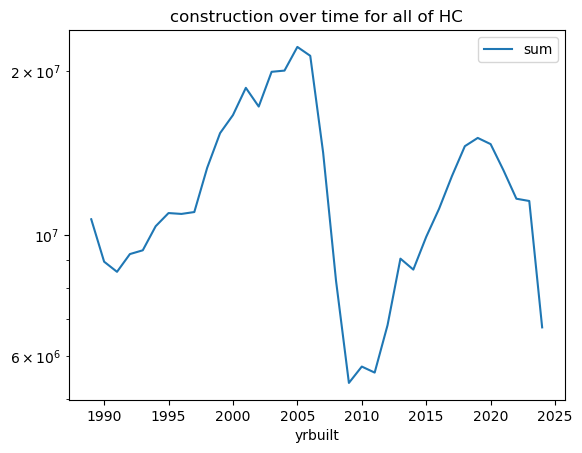

In [432]:
# Look at construction over time for all of HC
plt.figure(figsize=(6,6))
annbuilt.plot('yrbuilt','sum')
plt.yscale('log')
plt.title('construction over time for all of HC')
plt.show()

Construction Data needs to be scaled so that it can be used in the index

In [433]:
annbuilt.index=annbuilt.yrbuilt

In [434]:
annbuilt.drop(columns='yrbuilt',inplace=True)

In [435]:
# Creating values scaled to a range of 0-1
scaler = MinMaxScaler()
#fit,transform
houses_built_scaled = scaler.fit_transform(annbuilt.values.reshape(-1, 1))

In [436]:
# New standardized df
houses_built_scaled

array([[0.31797254],
       [0.21344466],
       [0.19114026],
       [0.23085829],
       [0.23969674],
       [0.29946709],
       [0.33489403],
       [0.33248269],
       [0.33769477],
       [0.47274053],
       [0.59742467],
       [0.67008259],
       [0.79069105],
       [0.70631184],
       [0.86841074],
       [0.87450424],
       [1.        ],
       [0.9513434 ],
       [0.52492917],
       [0.17225489],
       [0.        ],
       [0.02282656],
       [0.01423723],
       [0.08823614],
       [0.22032322],
       [0.19595584],
       [0.27231901],
       [0.34695334],
       [0.44561149],
       [0.54834072],
       [0.57912948],
       [0.5559504 ],
       [0.4641318 ],
       [0.37572077],
       [0.36906334],
       [0.08438703]])

In [437]:
construction_scale=pd.DataFrame(houses_built_scaled)

In [438]:
construction_scale['year']=annbuilt.index

In [439]:
construction_scale.rename(columns={0:'scaled'},inplace=True)

### Housing, Population Density and Change

The impact of coastal development extends beyond the shoreline. In an estuarine environment, the watersheds that feed into the estuary (or in the case the bay) are equally important. Using a highway as a physical boundary overlapped with a map of the various watersheds, a representative set of properties, the type, their acreage and the year that they were built will be used as an estimate and proxy for coastline development.  Based on research literature, concentration of non-organic nitrates and phosphates will serve as a proxy for the introduction of artificial damaging compounds - however, in the construction of more complex models, more granular data can be used.

In [440]:
## New Construction estimates by year

In [441]:
# Get annual change of homes built on hillsborough bay coast from 1990-present
perchange=[]
year=1989
year1=[]
x_base=[]
x1=[]
for x in range(1989,1989+len(dfyearbuilt)):
    if x==0:
        continue
    elif x==1988+len(dfyearbuilt):
        break
    else:
        perchange.append(round((dfyearbuilt[x+1]/dfyearbuilt[x])*100,3))
        x_base.append(dfyearbuilt[x])
        x1.append(dfyearbuilt[x+1])
    year+=1
    year1.append(year)

NameError: name 'dfyearbuilt' is not defined

In [ ]:
perchange[0:5]

In [ ]:
dfperchange=pd.DataFrame()
dfperchange['percentchange']=perchange

In [442]:
dfperchange['x']=x_base
dfperchange['x+1']=x1
dfperchange['year']=year1

NameError: name 'dfperchange' is not defined

In [443]:
dfperchange.head(5)

NameError: name 'dfperchange' is not defined

In [444]:
dfprop[dfprop.YearBuilt>1989].groupby(['YearBuilt']).TotalNumBuildings.agg(['min', 'max', 'std', 'sum'])

min   max       std    sum
YearBuilt                            
1990       1.0   4.0  0.443977   70.0
1991       1.0   2.0  0.152499   44.0
1992       1.0   1.0  0.000000   64.0
1993       1.0   7.0  0.929039  104.0
1994       1.0   1.0  0.000000   69.0
1995       1.0   1.0  0.000000  103.0
1996       1.0   2.0  0.130734  118.0
1997       1.0   2.0  0.115470   76.0
1998       1.0   3.0  0.294418  107.0
1999       1.0  11.0  1.070100   99.0
2000       1.0   2.0  0.103695   94.0
2001       1.0   1.0  0.000000   70.0
2002       1.0   5.0  0.419314   95.0
2003       1.0   3.0  0.253479   80.0
2004       1.0  17.0  1.315192  164.0
2005       1.0   2.0  0.064018  245.0
2006       1.0   4.0  0.200000  228.0
2007       1.0   3.0  0.177850  192.0
2008       1.0   4.0  0.469030   68.0
2009       1.0   1.0  0.000000   18.0
2010       1.0   2.0  0.242536   18.0
2011       1.0  13.0  3.328201   25.0
2012       1.0   1.0  0.000000   12.0
2013       1.0   1.0  0.000000   39.0
2014       1.0   5.0  0.816119   55.0
2015       1.0   1.0  0.000000   56.0
2016       1.0   1.0  0.000000   19.0
2017       1.0   1.0  0.000000   23.0
2018       1.0   2.0  0.176777   33.0
2019       1.0   2.0  0.238833   36.0
2020       1.0   1.0  0.000000   41.0
2021       1.0   1.0  0.000000   51.0
2022       1.0   1.0  0.000000   85.0
2023       1.0   1.0  0.000000  115.0
2024       1.0   1.0  0.000000   93.0

In [445]:
dfacreage

NameError: name 'dfacreage' is not defined

In [446]:
# Describes number of houses built in subset data, total number of units per built structure
# Multi-unit buildings have an increased environmental impact per individual parcel
dfperchange_unit

NameError: name 'dfperchange_unit' is not defined

#### Population

In [447]:
### Looking into population statistics nolw

In [448]:
dfpop=pd.DataFrame()
dfpop['year']=0
dfpop['sumpop']=0

In [449]:
dfpop_staged.iloc[:,1]

0     12407
1    101040
2    101047
3    101054
4    101064
Name: OBJECTID, dtype: int64

In [450]:
dfpop_staged
## This file was originally a geodatabase file that has been read in as a CSV to access the non-geospatial data.

wkt_geom  OBJECTID  SMOD_LEVEL  \
0  MultiPolygon (((-82.72100607199996603 28.37449...     12407          30   
1  MultiPolygon (((-82.41634709599998132 27.71290...    101040          23   
2  MultiPolygon (((-82.37805279399998426 27.81459...    101047          23   
3  MultiPolygon (((-82.33898157599998058 27.82306...    101054          23   
4  MultiPolygon (((-82.21098576599996477 27.84849...    101064          23   

    SMOD_ID  ISO     CNTRY_NAME    JRC_NAME_MAIN  \
0  30_12407  USA  United States            Tampa   
1  23_87924  USA  United States  Sun City Center   
2  23_87931  USA  United States       Adamsville   
3  23_87938  USA  United States        Riverview   
4  23_87948  USA  United States         Fishhawk   

                                       JRC_NAME_LIST  \
0  Tampa; Saint Petersburg; Clearwater; Brandon; ...   
1  Sun City Center; Greater Sun Center; Ruskin; G...   
2             Adamsville; North Ruskin; Apollo Beach   
3                               Riverview; Riverview   
4                                           Fishhawk   

                           CIESIN_NAME                       CIESIN_NAME_TL  \
0                                Tampa                                Tampa   
1  Greater Sun Center, Sun City Center  Greater Sun Center, Sun City Center   
2                         Apollo Beach                         Apollo Beach   
3                        Panther Trace                        Panther Trace   
4                     Parkside Village                     Parkside Village   

   ...  GHSPOP_R23_1985  GHSPOP_R23_1990 GHSPOP_R23_1995  GHSPOP_R23_2000  \
0  ...     1.333843e+06     1.480168e+06    1.601766e+06     1.717621e+06   
1  ...     1.568739e+04     1.837320e+04    2.062473e+04     2.210739e+04   
2  ...     7.839934e+03     9.115709e+03    1.024629e+04     1.101930e+04   
3  ...     1.382634e+04     1.547221e+04    1.716790e+04     1.918479e+04   
4  ...     4.166395e+03     4.651319e+03    5.197914e+03     5.798763e+03   

  GHSPOP_R23_2005  GHSPOP_R23_2010  GHSPOP_R23_2015  GHSPOP_R23_2020  \
0    1.824984e+06     1.920968e+06     2.045045e+06     2.191664e+06   
1    2.713719e+04     2.711277e+04     2.903848e+04     3.109123e+04   
2    1.340539e+04     1.364281e+04     1.467739e+04     1.571192e+04   
3    2.176125e+04     2.414159e+04     2.630752e+04     2.811921e+04   
4    6.694678e+03     7.502811e+03     8.249881e+03     8.864453e+03   

   GHSPOP_R23_2025  GHSPOP_R23_2030  
0     2.261370e+06     2.330530e+06  
1     3.220606e+04     3.357573e+04  
2     1.632053e+04     1.699778e+04  
3     2.902663e+04     2.993258e+04  
4     9.098630e+03     9.350476e+03  

[5 rows x 30 columns]

In [451]:
dfpop_staged

wkt_geom  OBJECTID  SMOD_LEVEL  \
0  MultiPolygon (((-82.72100607199996603 28.37449...     12407          30   
1  MultiPolygon (((-82.41634709599998132 27.71290...    101040          23   
2  MultiPolygon (((-82.37805279399998426 27.81459...    101047          23   
3  MultiPolygon (((-82.33898157599998058 27.82306...    101054          23   
4  MultiPolygon (((-82.21098576599996477 27.84849...    101064          23   

    SMOD_ID  ISO     CNTRY_NAME    JRC_NAME_MAIN  \
0  30_12407  USA  United States            Tampa   
1  23_87924  USA  United States  Sun City Center   
2  23_87931  USA  United States       Adamsville   
3  23_87938  USA  United States        Riverview   
4  23_87948  USA  United States         Fishhawk   

                                       JRC_NAME_LIST  \
0  Tampa; Saint Petersburg; Clearwater; Brandon; ...   
1  Sun City Center; Greater Sun Center; Ruskin; G...   
2             Adamsville; North Ruskin; Apollo Beach   
3                               Riverview; Riverview   
4                                           Fishhawk   

                           CIESIN_NAME                       CIESIN_NAME_TL  \
0                                Tampa                                Tampa   
1  Greater Sun Center, Sun City Center  Greater Sun Center, Sun City Center   
2                         Apollo Beach                         Apollo Beach   
3                        Panther Trace                        Panther Trace   
4                     Parkside Village                     Parkside Village   

   ...  GHSPOP_R23_1985  GHSPOP_R23_1990 GHSPOP_R23_1995  GHSPOP_R23_2000  \
0  ...     1.333843e+06     1.480168e+06    1.601766e+06     1.717621e+06   
1  ...     1.568739e+04     1.837320e+04    2.062473e+04     2.210739e+04   
2  ...     7.839934e+03     9.115709e+03    1.024629e+04     1.101930e+04   
3  ...     1.382634e+04     1.547221e+04    1.716790e+04     1.918479e+04   
4  ...     4.166395e+03     4.651319e+03    5.197914e+03     5.798763e+03   

  GHSPOP_R23_2005  GHSPOP_R23_2010  GHSPOP_R23_2015  GHSPOP_R23_2020  \
0    1.824984e+06     1.920968e+06     2.045045e+06     2.191664e+06   
1    2.713719e+04     2.711277e+04     2.903848e+04     3.109123e+04   
2    1.340539e+04     1.364281e+04     1.467739e+04     1.571192e+04   
3    2.176125e+04     2.414159e+04     2.630752e+04     2.811921e+04   
4    6.694678e+03     7.502811e+03     8.249881e+03     8.864453e+03   

   GHSPOP_R23_2025  GHSPOP_R23_2030  
0     2.261370e+06     2.330530e+06  
1     3.220606e+04     3.357573e+04  
2     1.632053e+04     1.699778e+04  
3     2.902663e+04     2.993258e+04  
4     9.098630e+03     9.350476e+03  

[5 rows x 30 columns]

In [452]:
dfpop_staged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   wkt_geom         5 non-null      object 
 1   OBJECTID         5 non-null      int64  
 2   SMOD_LEVEL       5 non-null      int64  
 3   SMOD_ID          5 non-null      object 
 4   ISO              5 non-null      object 
 5   CNTRY_NAME       5 non-null      object 
 6   JRC_NAME_MAIN    5 non-null      object 
 7   JRC_NAME_LIST    5 non-null      object 
 8   CIESIN_NAME      5 non-null      object 
 9   CIESIN_NAME_TL   5 non-null      object 
 10  AREA_SQKM        5 non-null      float64
 11  AREA_SQM         5 non-null      float64
 12  CIESIN_NAME_ADJ  5 non-null      object 
 13  ADJ              1 non-null      float64
 14  GHSPOP_R19_1975  5 non-null      object 
 15  GHSPOP_R19_1990  5 non-null      float64
 16  GHSPOP_R19_2000  5 non-null      float64
 17  GHSPOP_R19_2015  5 n

In [453]:
est_pop=dfpop_staged.iloc[0:,21:29]

In [454]:
#area=sum(dfpop_staged.iloc[1:,10])

In [455]:
# Set up series for 5 year intervals
f=pd.Series()
counter=1990
for x in nont.columns:
    f[counter]=sum(est_pop[x])
    counter+=5

NameError: name 'nont' is not defined

In [456]:
f=f.to_frame().reset_index()

In [457]:
#calculate population density
population_density=f[0]/area

NameError: name 'area' is not defined

In [458]:
year=[1990,1995,2000,2005,2010,2015,2020,2025]

In [459]:
model=LinearRegression()

In [460]:
X_train,X_test,y_train,y_test = train_test_split(popden.year,popden.density, test_size=0.3, shuffle=False)

NameError: name 'popden' is not defined

In [461]:
model.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [462]:
model.score(X_test,y_test) 

NameError: name 'X_test' is not defined

In [463]:
den.to_csv('population_density.csv')

NameError: name 'den' is not defined

In [464]:
os.chdir('J:\\Brainstation\\Capstone Git\\data\\human Imact\\2024 Hillsborough Shape Files')
dev=gpd.read_file('Tampa_Bay_Development.shp')
dev_df=pd.read_csv('hc_shp.csv',encoding='cp1252',low_memory=False)
dev_df.info()
dev_df.head(10)
pwd
plt.figure(figsize=(50,50))
dev.plot(column='FLUCSDESC',figsize=(50,50))
#plt.plot(dev)
#plt.legend()
#plt.savefig('test.png')
plt.show()


NameError: name 'gpd' is not defined

In [465]:
os.chdir('J:\\Brainstation\\Capstone Git\\data\\human Imact\\Population Data')
pop_metro=pd.read_csv('tampa_metro_population.csv',header=0)
pop_metro.info()
pop_metro
sns.lineplot(x='Year',y='Population',data=pop_metro)
plt.xlabel='year'
plt.ylabel='Population'






sns.scatterplot(x='Year',y=np.log(pop_metro.Population),data=pop_metro)
plt.set_xlabel='Population (per 100k)'
plt.title('Tampa Regional Population Over Time')
plt.show()
LinRegLog=LinearRegression()
X=pop_metro.Year.to_frame()
y=pop_metro.Population
LinRegLog.fit(X,y)
LinRegLog.score(X,y)
LinRegLog.coef_
LinRegLog.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
LinRegLog.fit(X_train,y_train)
LinRegLog.score(X_train,y_train)
LinRegLog.score(X_test,y_test)

pwd
os.chdir('J:\\Brainstation\\BS Git\\Property Records\\GIS\\Zips\\')

SyntaxError: invalid syntax (2164171991.py, line 24)

In [466]:
os.chdir('J:\\Brainstation\\Capstone Git\\data\\human Imact\\Population Data')

In [467]:
pop_metro=pd.read_csv('tampa_metro_population.csv',header=0)

In [468]:
pop_metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 54 non-null     int64  
 1   Population                           54 non-null     int64  
 2           Index                        54 non-null     float64
 3           Percent Change               54 non-null     object 
 4           Percent of Statewide Total   54 non-null     float64
 5           Percent of Nationwide Total  54 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 2.7+ KB


In [469]:
pop_metro

Year  Population          Index         Percent Change  \
0   1969      483694     100.000000                      N   
1   1970      493409     102.008501            2.008501243   
2   1971      513136     106.086906            3.998102994   
3   1972      533386     110.273437            3.946322223   
4   1973      564604     116.727518            5.852797036   
5   1974      586558     121.266338             3.88838903   
6   1975      593254     122.650684            1.141575087   
7   1976      601762     124.409647            1.434124338   
8   1977      607712     125.639764            0.988762999   
9   1978      620076     128.195925             2.03451635   
10  1979      638450     131.994608            2.963185158   
11  1980      651833     134.761440            2.096170413   
12  1981      670180     138.554541            2.814677993   
13  1982      688100     142.259362            2.673908502   
14  1983      709700     146.724996            3.139078622   
15  1984      731907     151.316121            3.129068621   
16  1985      756424     156.384822            3.349742522   
17  1986      777630     160.768999            2.803454147   
18  1987      798473     165.078128            2.680323547   
19  1988      816682     168.842698            2.280477862   
20  1989      827379     171.054220            1.309812142   
21  1990      837028     173.049077            1.166212824   
22  1991      850326     175.798335            1.588716268   
23  1992      864957     178.823182            1.720634204   
24  1993      879024     181.731425            1.626323621   
25  1994      890958     184.198688            1.357642112   
26  1995      906385     187.388101            1.731506985   
27  1996      922203     190.658350            1.745174512   
28  1997      943919     195.147965             2.35479607   
29  1998      965130     199.533176            2.247120781   
30  1999      984930     203.626673            2.051537099   
31  2000     1003435     207.452439            1.878813723   
32  2001     1028385     212.610659            2.486459013   
33  2002     1054860     218.084161            2.574424948   
34  2003     1077462     222.756950            2.142654002   
35  2004     1108225     229.116962            2.855135494   
36  2005     1143154     236.338264            3.151796792   
37  2006     1171826     242.265978            2.508148508   
38  2007     1184686     244.924684            1.097432554   
39  2008     1196773     247.423578             1.02027035   
40  2009     1214050     250.995464            1.443632168   
41  2010     1232824     254.876844              1.5463943   
42  2011     1252135     258.869244            1.566403639   
43  2012     1273418     263.269340             1.69973685   
44  2013     1294996     267.730425            1.694494659   
45  2014     1320093     272.919036            1.937998264   
46  2015     1348664     278.825869            2.164317211   
47  2016     1378621     285.019248            2.221235237   
48  2017     1405901     290.659177            1.978788949   
49  2018     1428652     295.362771            1.618250503   
50  2019     1446165     298.983448            1.225840863   
51  2020     1466255     303.136901            1.389191413   
52  2021     1484607     306.931035            1.251624035   
53  2022     1513473     312.898858             1.94435295   

            Percent of Statewide Total          Percent of Nationwide Total  
0                             7.283451                             0.240288  
1                             7.207941                             0.242106  
2                             7.163676                             0.248111  
3                             7.092593                             0.254873  
4                             7.122454                             0.267143  
5                             7.052490                             0.274949  
6                             6.945418         

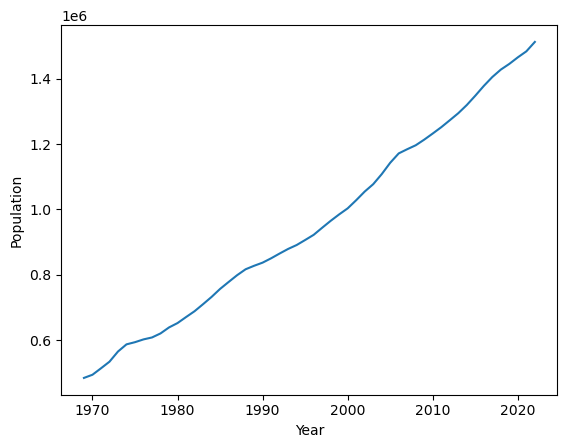

In [470]:
sns.lineplot(x='Year',y='Population',data=pop_metro)
plt.xlabel='year'
plt.ylabel='Population'

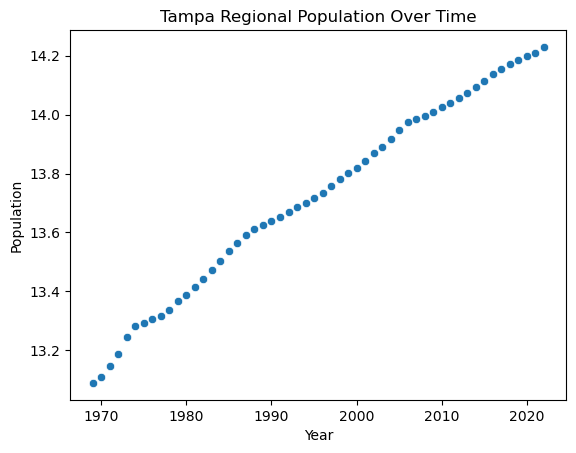

In [471]:

sns.scatterplot(x='Year',y=np.log(pop_metro.Population),data=pop_metro)
plt.set_xlabel='Population (per 100k)'
plt.title('Tampa Regional Population Over Time')
plt.show()

In [472]:
LinRegLog=LinearRegression()

In [473]:
X=pop_metro.Year.to_frame()
y=pop_metro.Population

In [474]:
LinRegLog.fit(X,y)

LinearRegression()

In [475]:
LinRegLog.score(X,y)

0.992766818417056

In [476]:
LinRegLog.coef_

array([19270.39142367])

In [477]:
LinRegLog.

SyntaxError: invalid syntax (2138658662.py, line 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
LinRegLog.fit(X_train,y_train)

In [ ]:
LinRegLog.score(X_train,y_train)

In [ ]:
LinRegLog.score(X_test,y_test)

In [ ]:
pwd

In [ ]:
os.chdir('J:\\Brainstation\\BS Git\\Property Records\\GIS\\Zips\\')